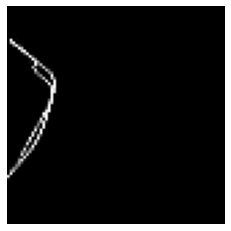

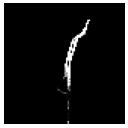

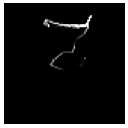

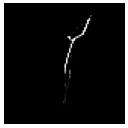

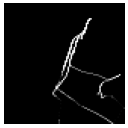

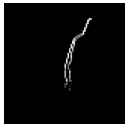

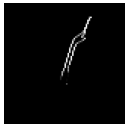

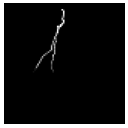

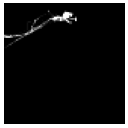

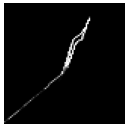

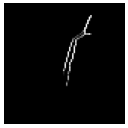

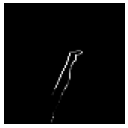

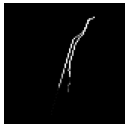

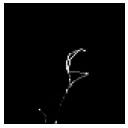

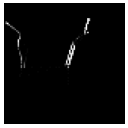

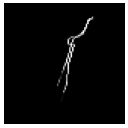

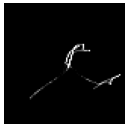

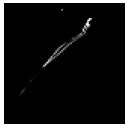

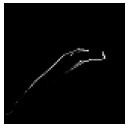

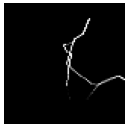

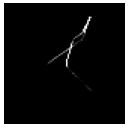

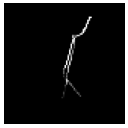

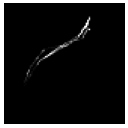

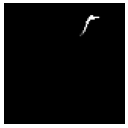

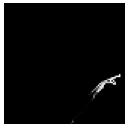

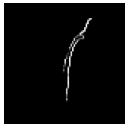

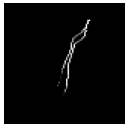

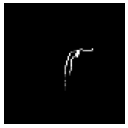

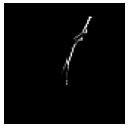

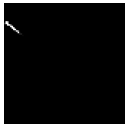

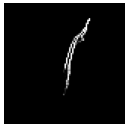

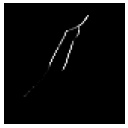

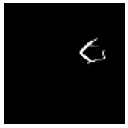

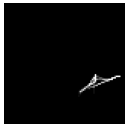

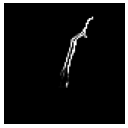

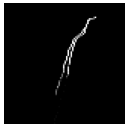

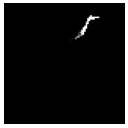

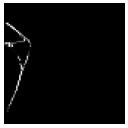

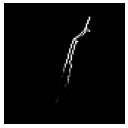

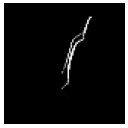

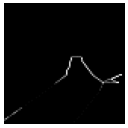

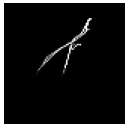

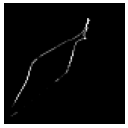

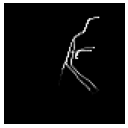

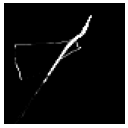

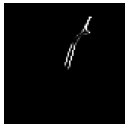

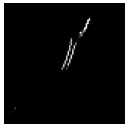

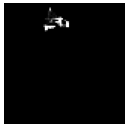

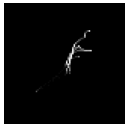

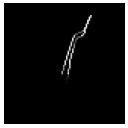

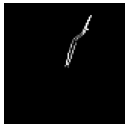

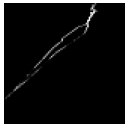

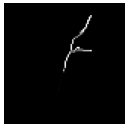

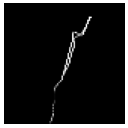

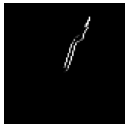

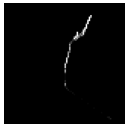

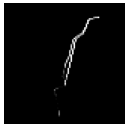

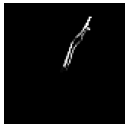

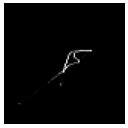

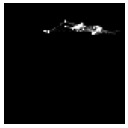

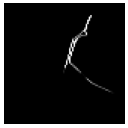

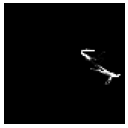

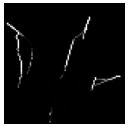

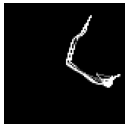

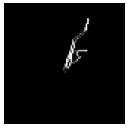

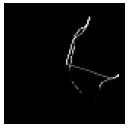

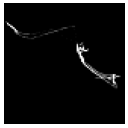

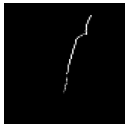

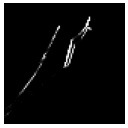

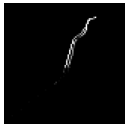

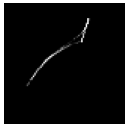

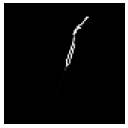

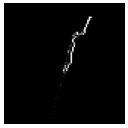

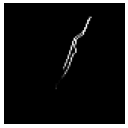

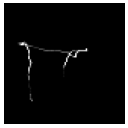

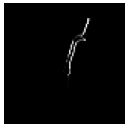

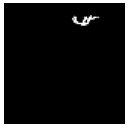

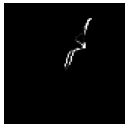

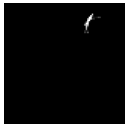

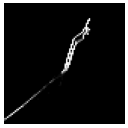

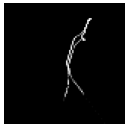

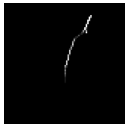

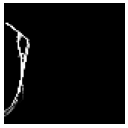

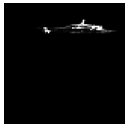

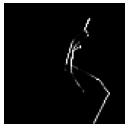

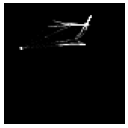

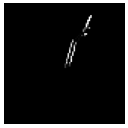

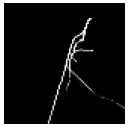

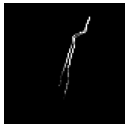

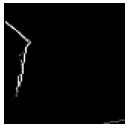

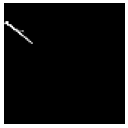

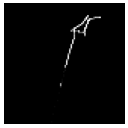

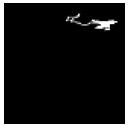

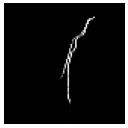

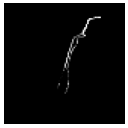

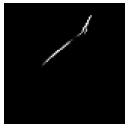

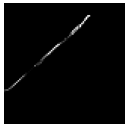

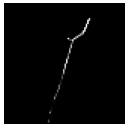

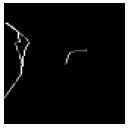

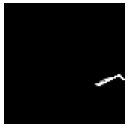

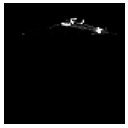

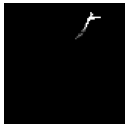

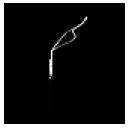

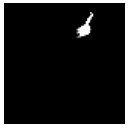

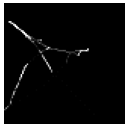

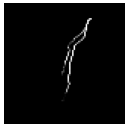

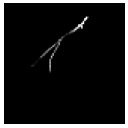

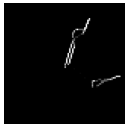

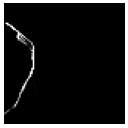

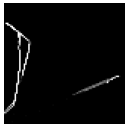

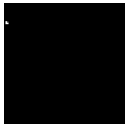

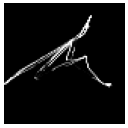

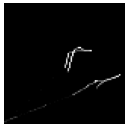

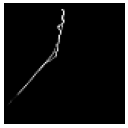

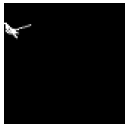

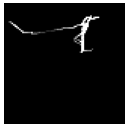

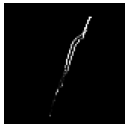

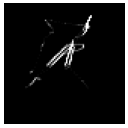

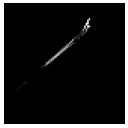

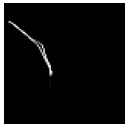

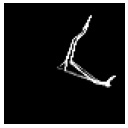

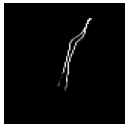

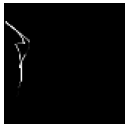

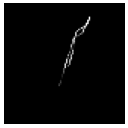

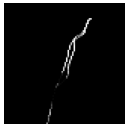

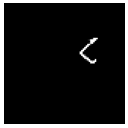

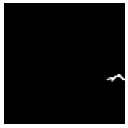

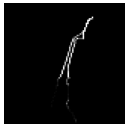

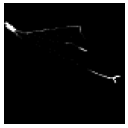

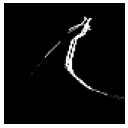

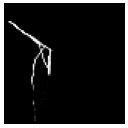

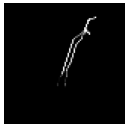

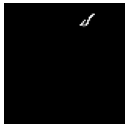

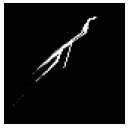

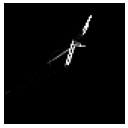

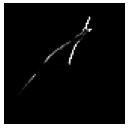

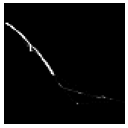

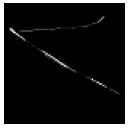

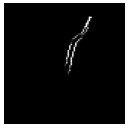

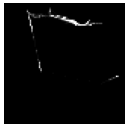

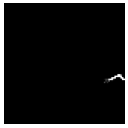

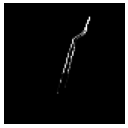

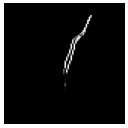

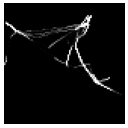

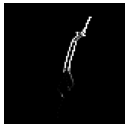

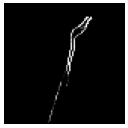

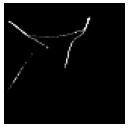

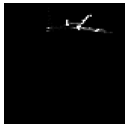

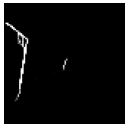

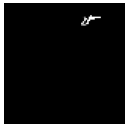

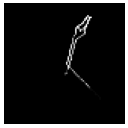

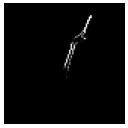

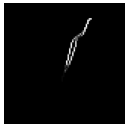

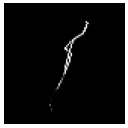

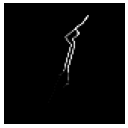

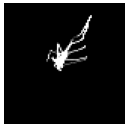

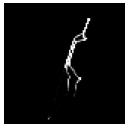

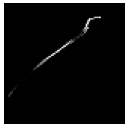

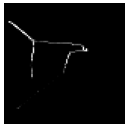

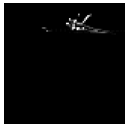

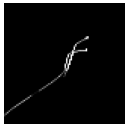

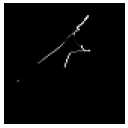

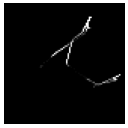

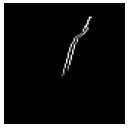

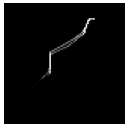

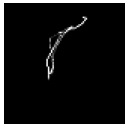

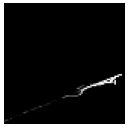

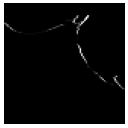

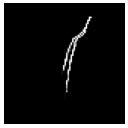

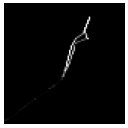

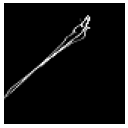

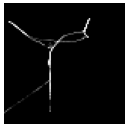

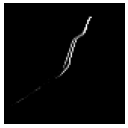

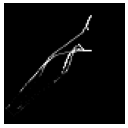

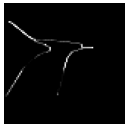

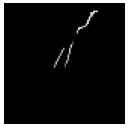

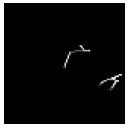

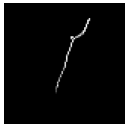

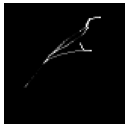

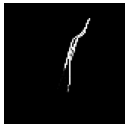

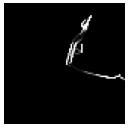

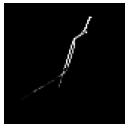

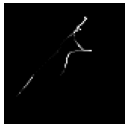

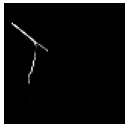

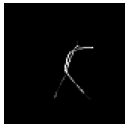

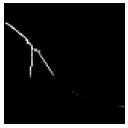

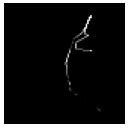

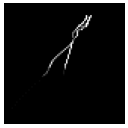

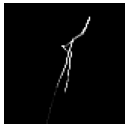

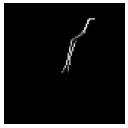

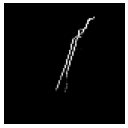

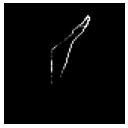

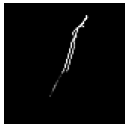

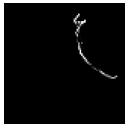

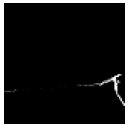

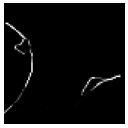

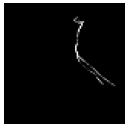

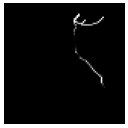

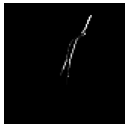

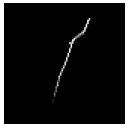

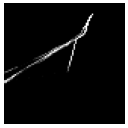

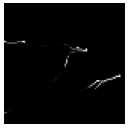

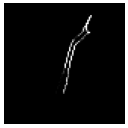

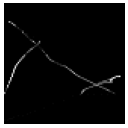

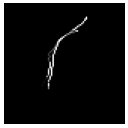

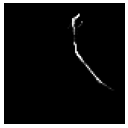

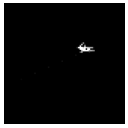

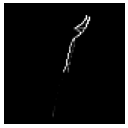

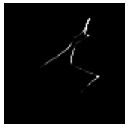

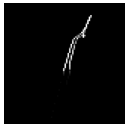

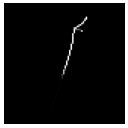

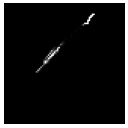

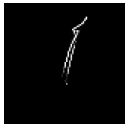

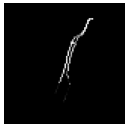

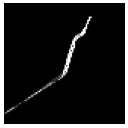

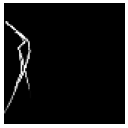

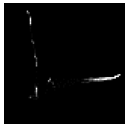

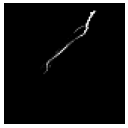

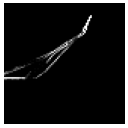

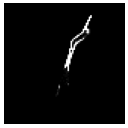

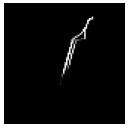

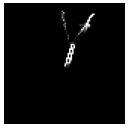

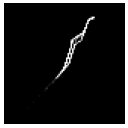

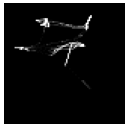

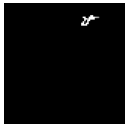

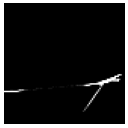

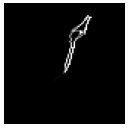

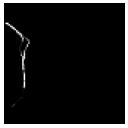

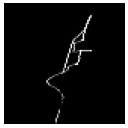

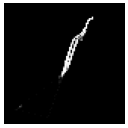

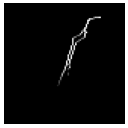

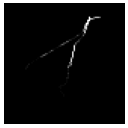

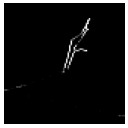

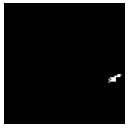

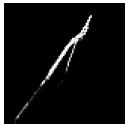

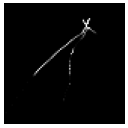

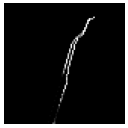

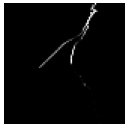

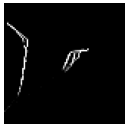

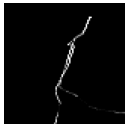

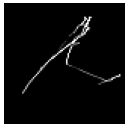

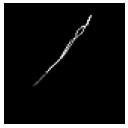

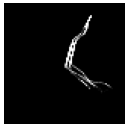

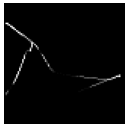

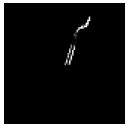

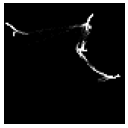

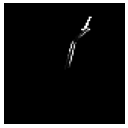

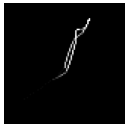

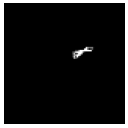

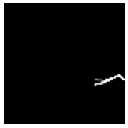

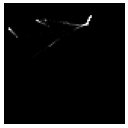

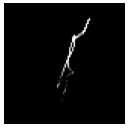

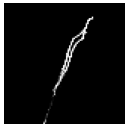

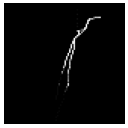

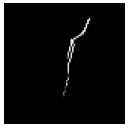

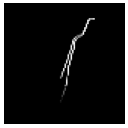

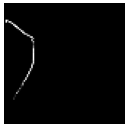

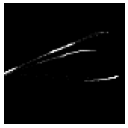

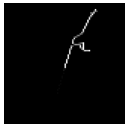

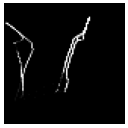

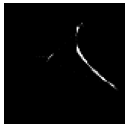

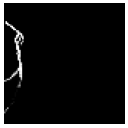

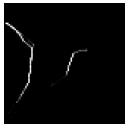

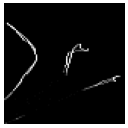

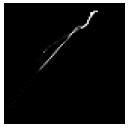

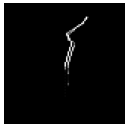

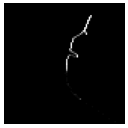

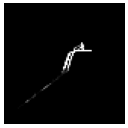

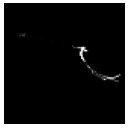

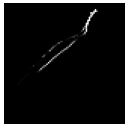

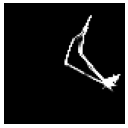

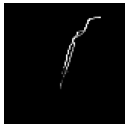

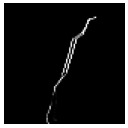

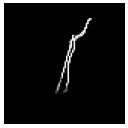

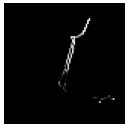

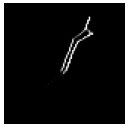

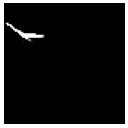

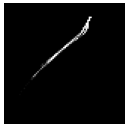

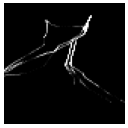

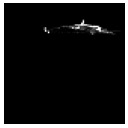

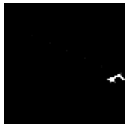

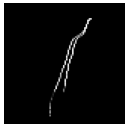

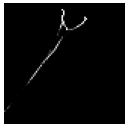

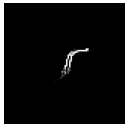

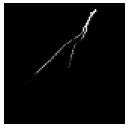

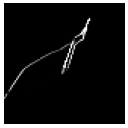

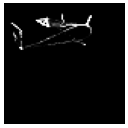

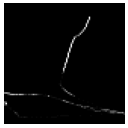

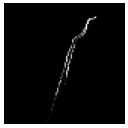

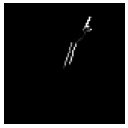

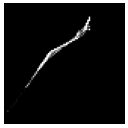

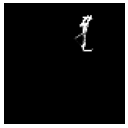

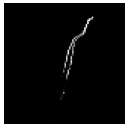

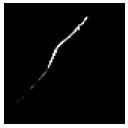

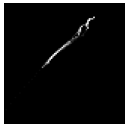

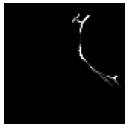

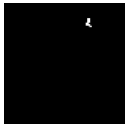

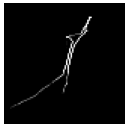

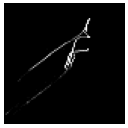

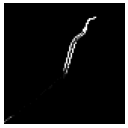

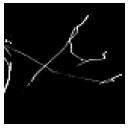

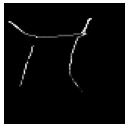

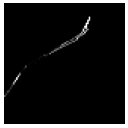

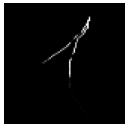

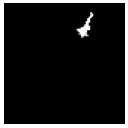

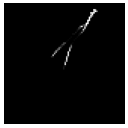

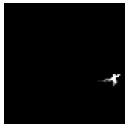

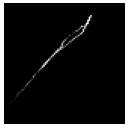

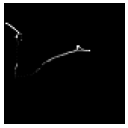

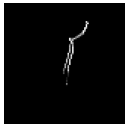

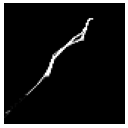

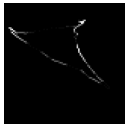

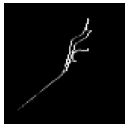

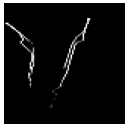

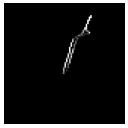

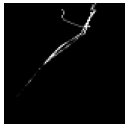

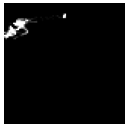

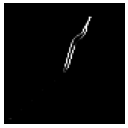

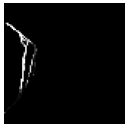

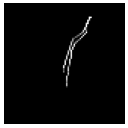

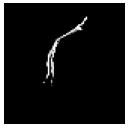

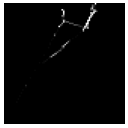

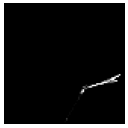

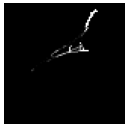

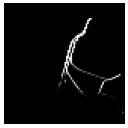

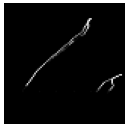

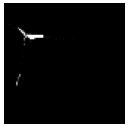

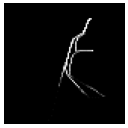

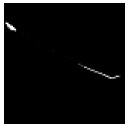

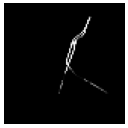

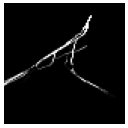

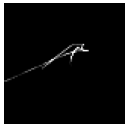

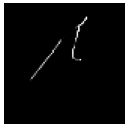

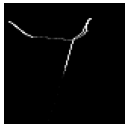

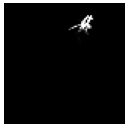

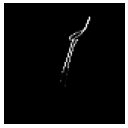

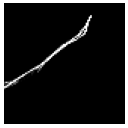

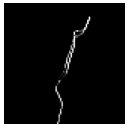

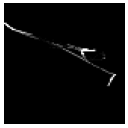

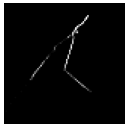

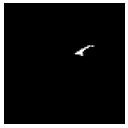

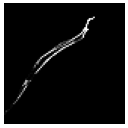

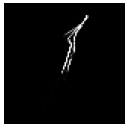

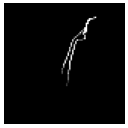

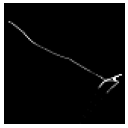

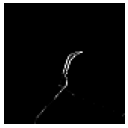

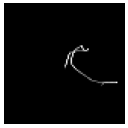

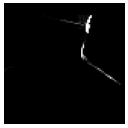

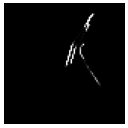

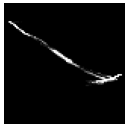

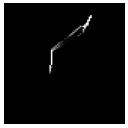

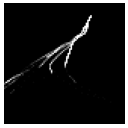

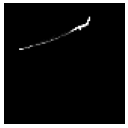

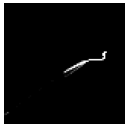

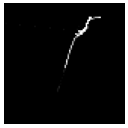

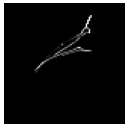

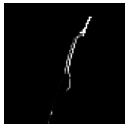

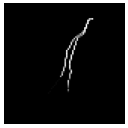

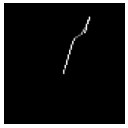

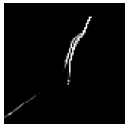

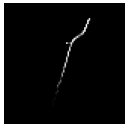

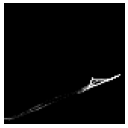

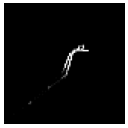

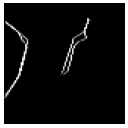

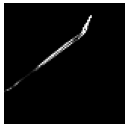

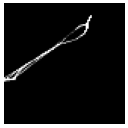

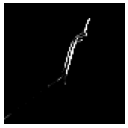

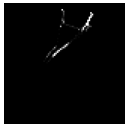

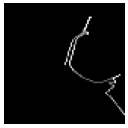

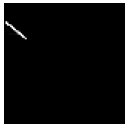

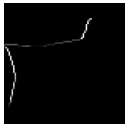

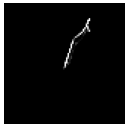

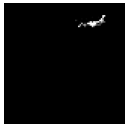

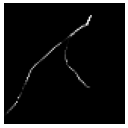

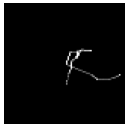

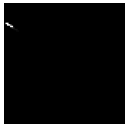

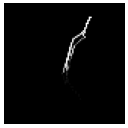

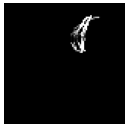

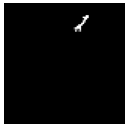

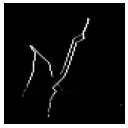

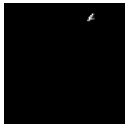

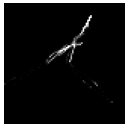

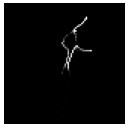

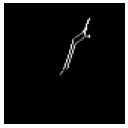

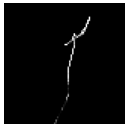

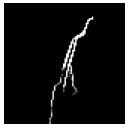

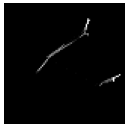

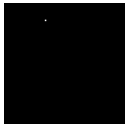

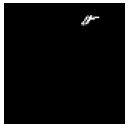

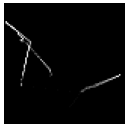

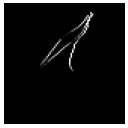

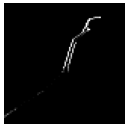

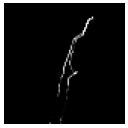

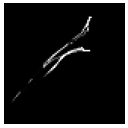

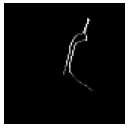

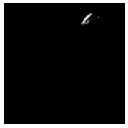

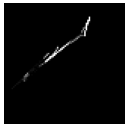

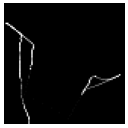

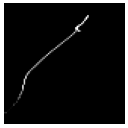

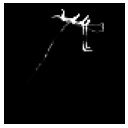

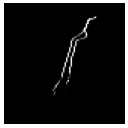

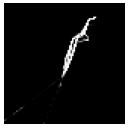

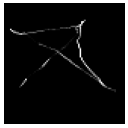

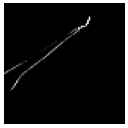

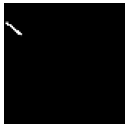

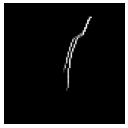

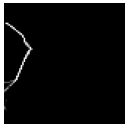

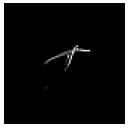

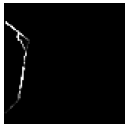

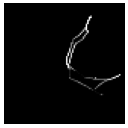

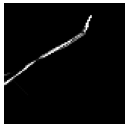

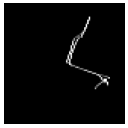

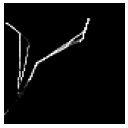

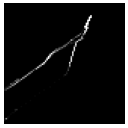

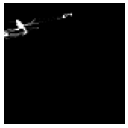

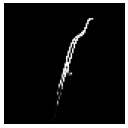

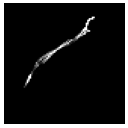

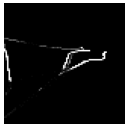

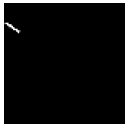

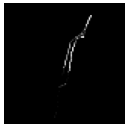

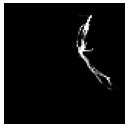

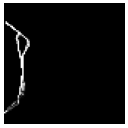

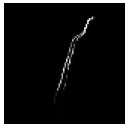

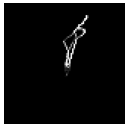

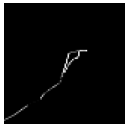

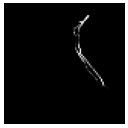

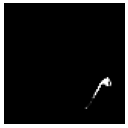

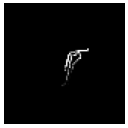

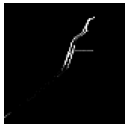

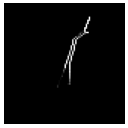

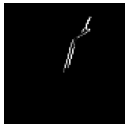

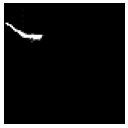

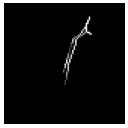

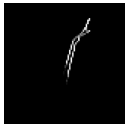

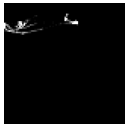

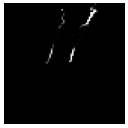

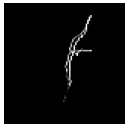

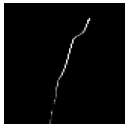

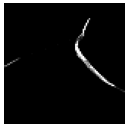

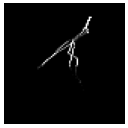

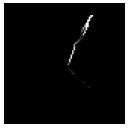

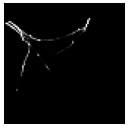

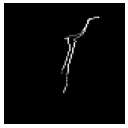

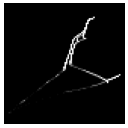

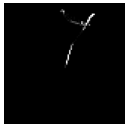

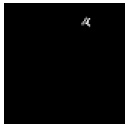

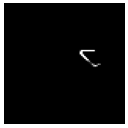

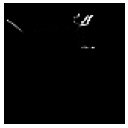

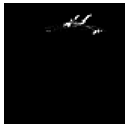

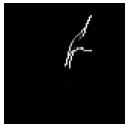

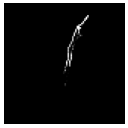

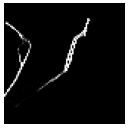

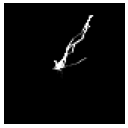

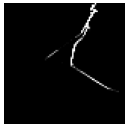

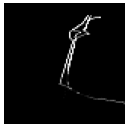

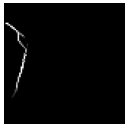

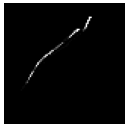

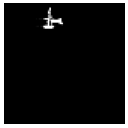

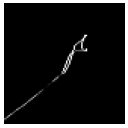

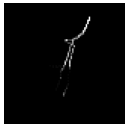

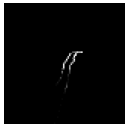

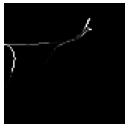

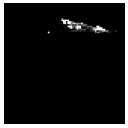

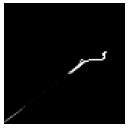

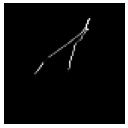

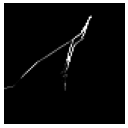

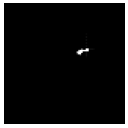

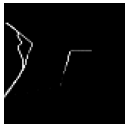

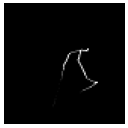

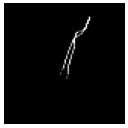

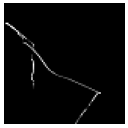

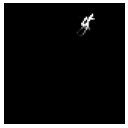

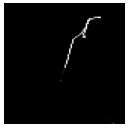

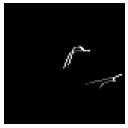

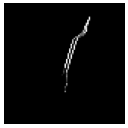

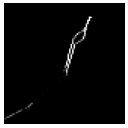

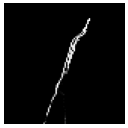

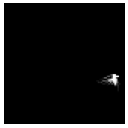

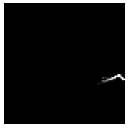

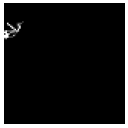

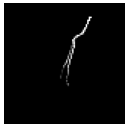

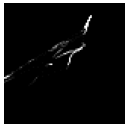

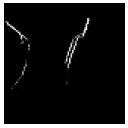

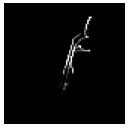

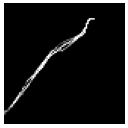

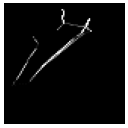

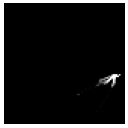

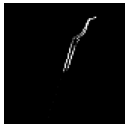

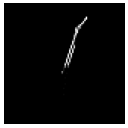

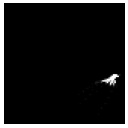

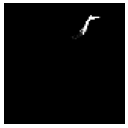

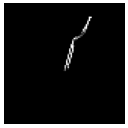

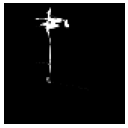

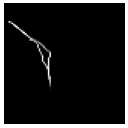

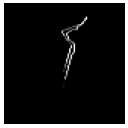

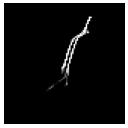

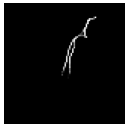

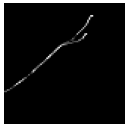

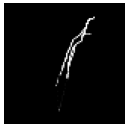

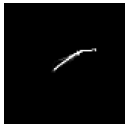

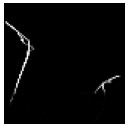

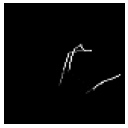

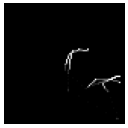

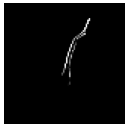

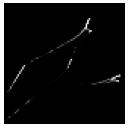

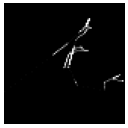

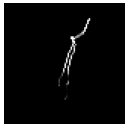

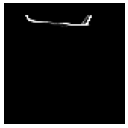

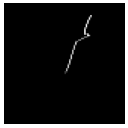

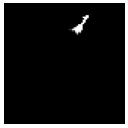

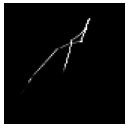

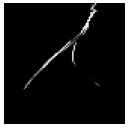

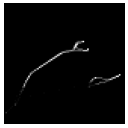

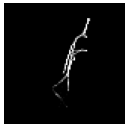

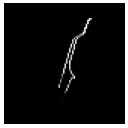

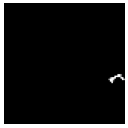

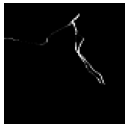

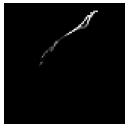

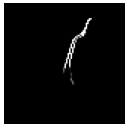

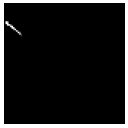

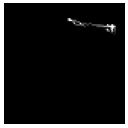

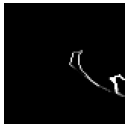

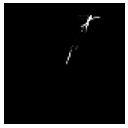

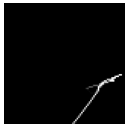

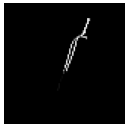

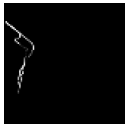

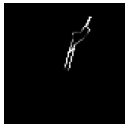

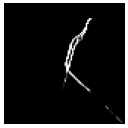

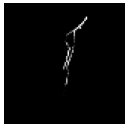

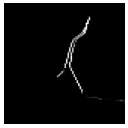

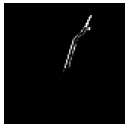

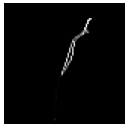

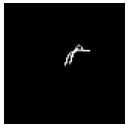

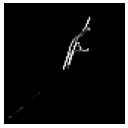

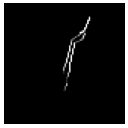

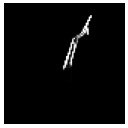

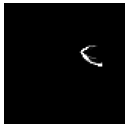

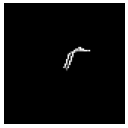

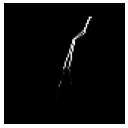

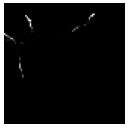

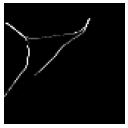

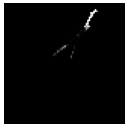

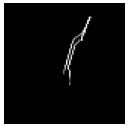

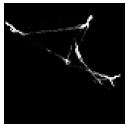

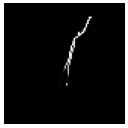

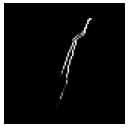

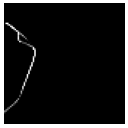

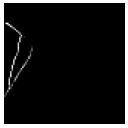

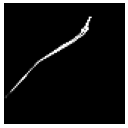

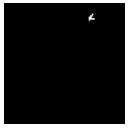

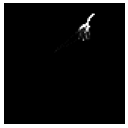

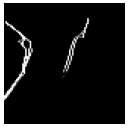

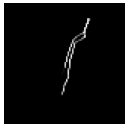

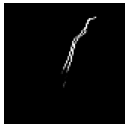

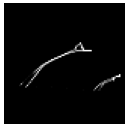

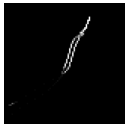

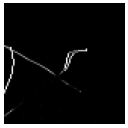

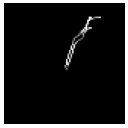

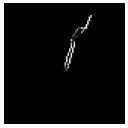

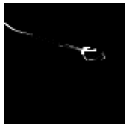

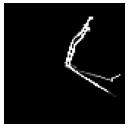

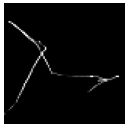

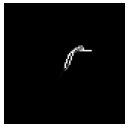

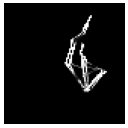

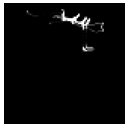

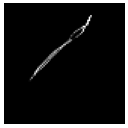

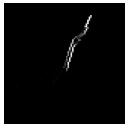

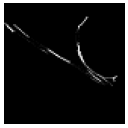

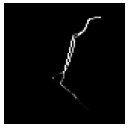

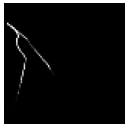

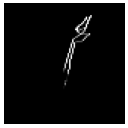

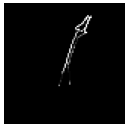

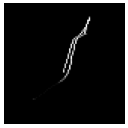

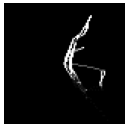

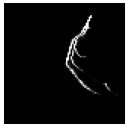

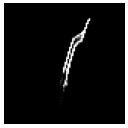

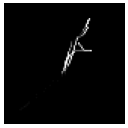

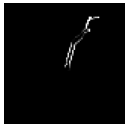

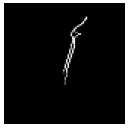

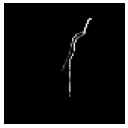

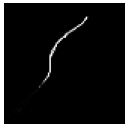

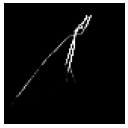

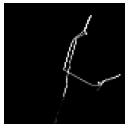

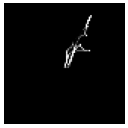

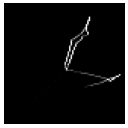

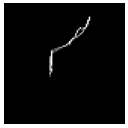

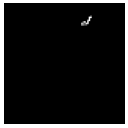

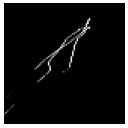

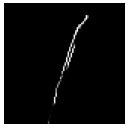

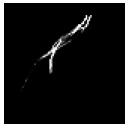

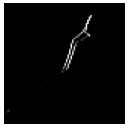

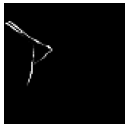

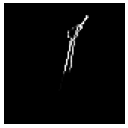

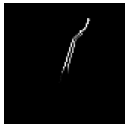

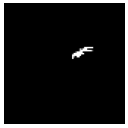

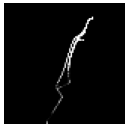

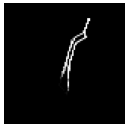

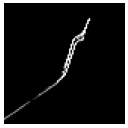

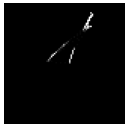

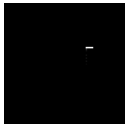

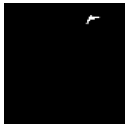

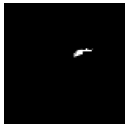

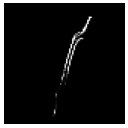

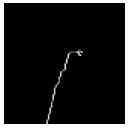

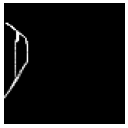

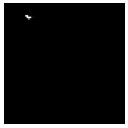

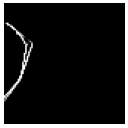

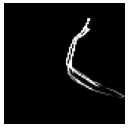

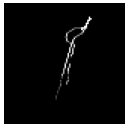

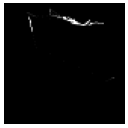

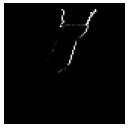

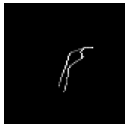

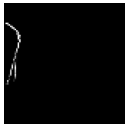

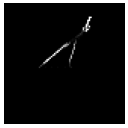

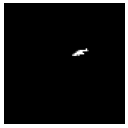

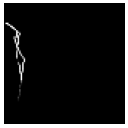

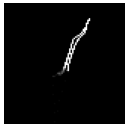

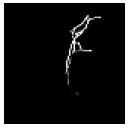

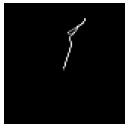

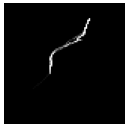

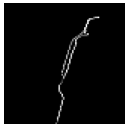

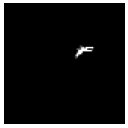

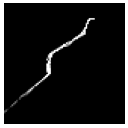

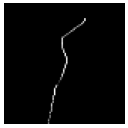

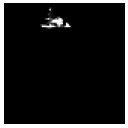

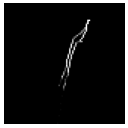

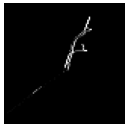

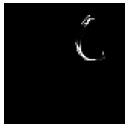

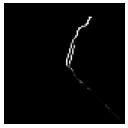

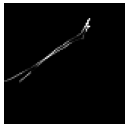

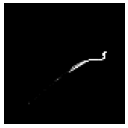

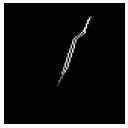

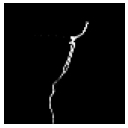

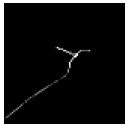

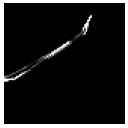

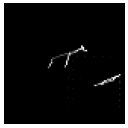

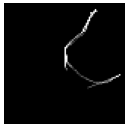

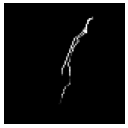

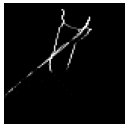

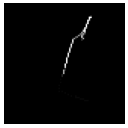

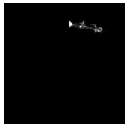

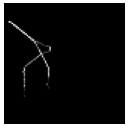

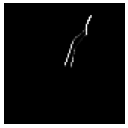

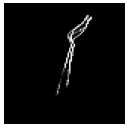

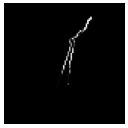

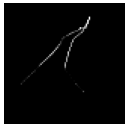

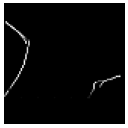

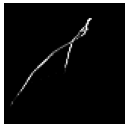

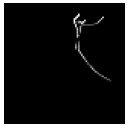

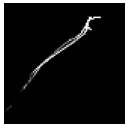

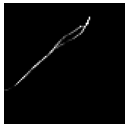

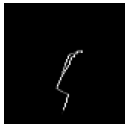

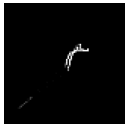

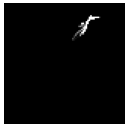

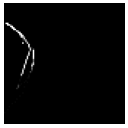

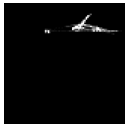

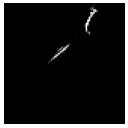

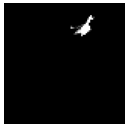

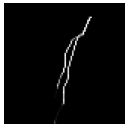

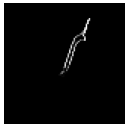

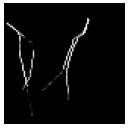

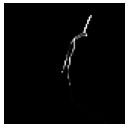

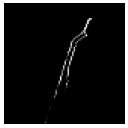

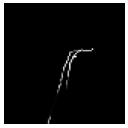

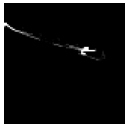

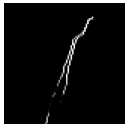

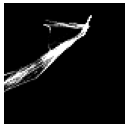

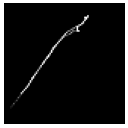

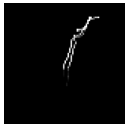

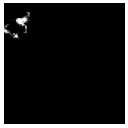

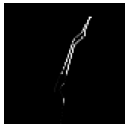

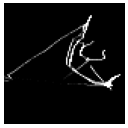

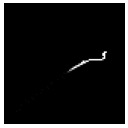

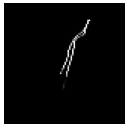

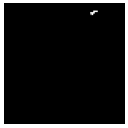

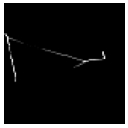

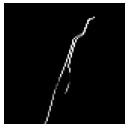

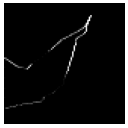

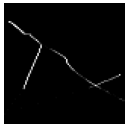

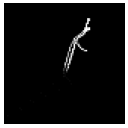

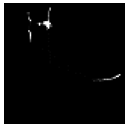

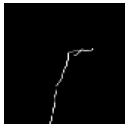

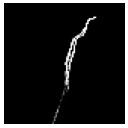

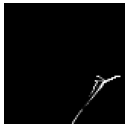

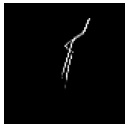

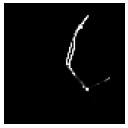

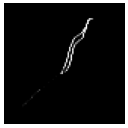

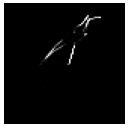

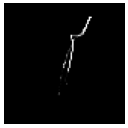

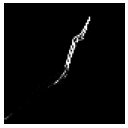

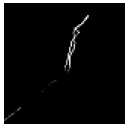

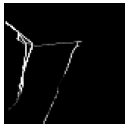

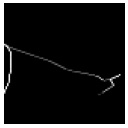

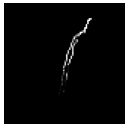

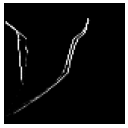

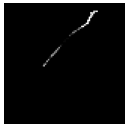

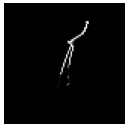

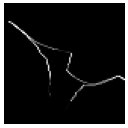

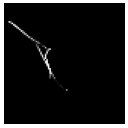

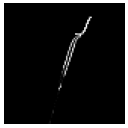

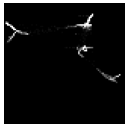

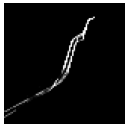

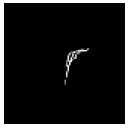

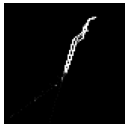

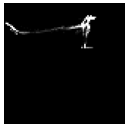

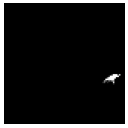

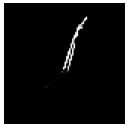

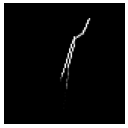

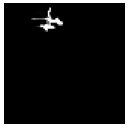

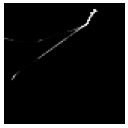

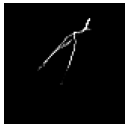

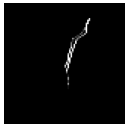

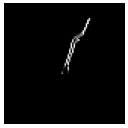

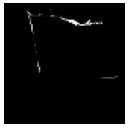

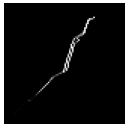

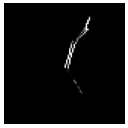

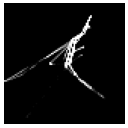

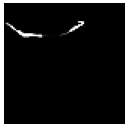

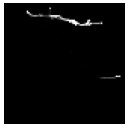

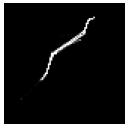

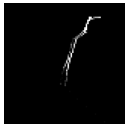

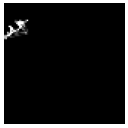

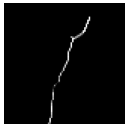

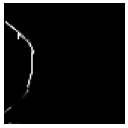

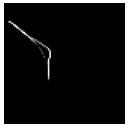

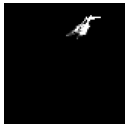

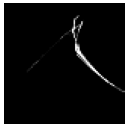

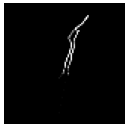

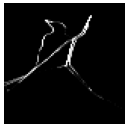

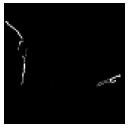

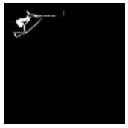

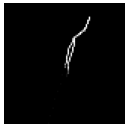

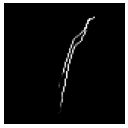

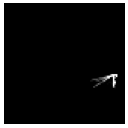

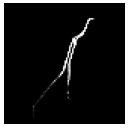

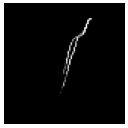

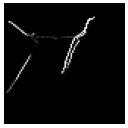

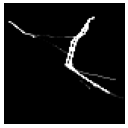

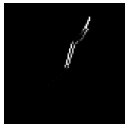

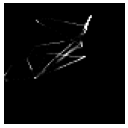

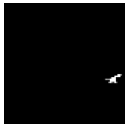

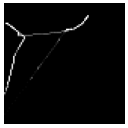

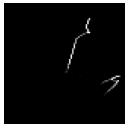

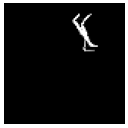

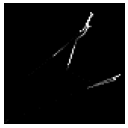

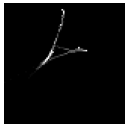

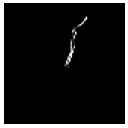

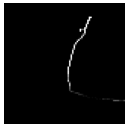

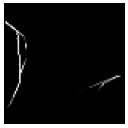

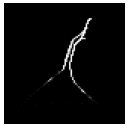

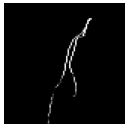

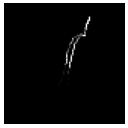

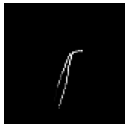

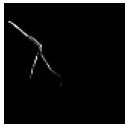

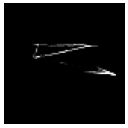

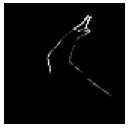

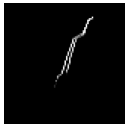

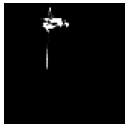

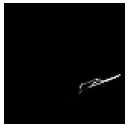

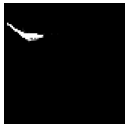

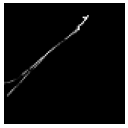

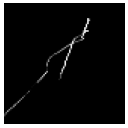

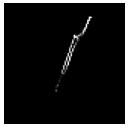

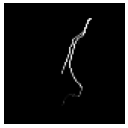

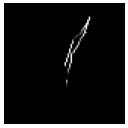

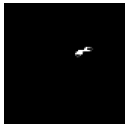

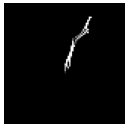

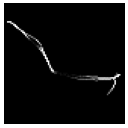

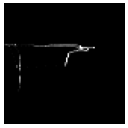

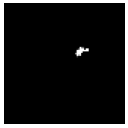

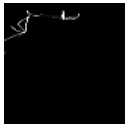

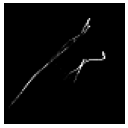

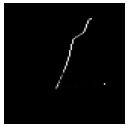

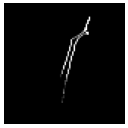

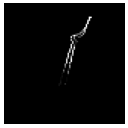

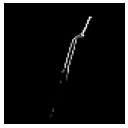

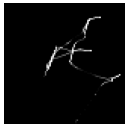

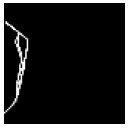

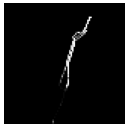

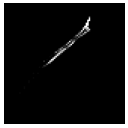

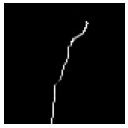

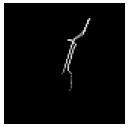

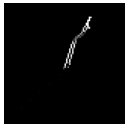

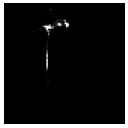

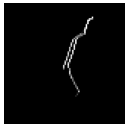

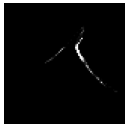

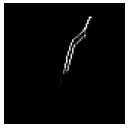

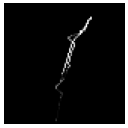

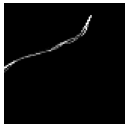

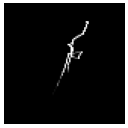

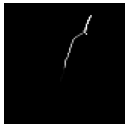

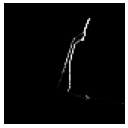

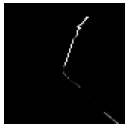

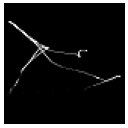

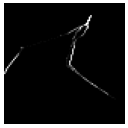

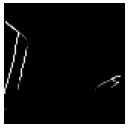

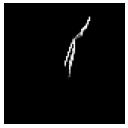

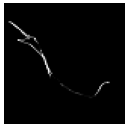

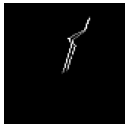

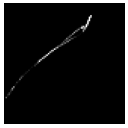

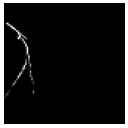

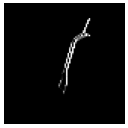

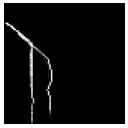

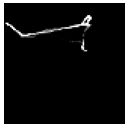

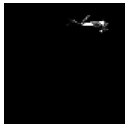

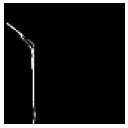

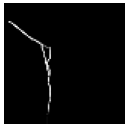

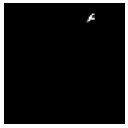

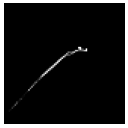

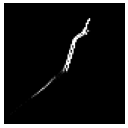

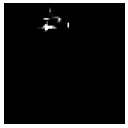

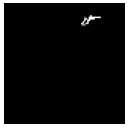

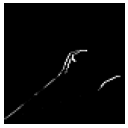

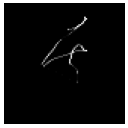

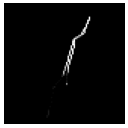

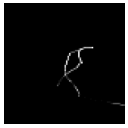

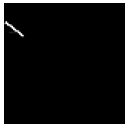

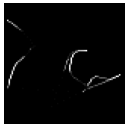

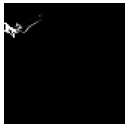

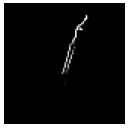

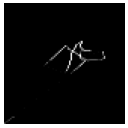

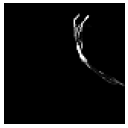

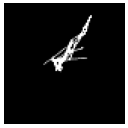

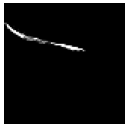

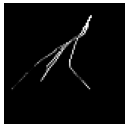

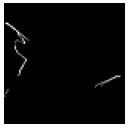

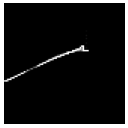

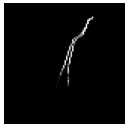

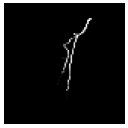

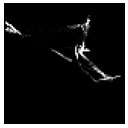

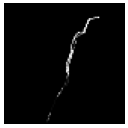

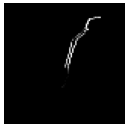

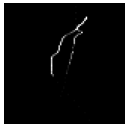

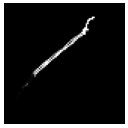

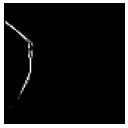

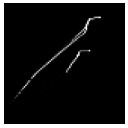

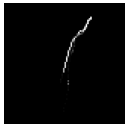

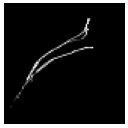

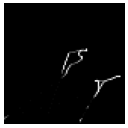

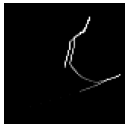

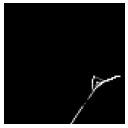

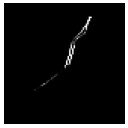

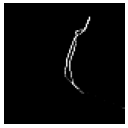

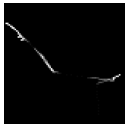

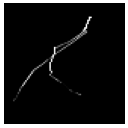

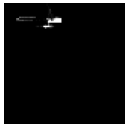

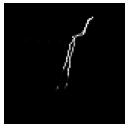

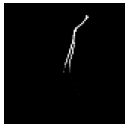

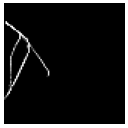

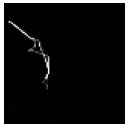

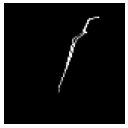

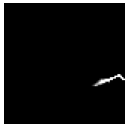

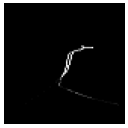

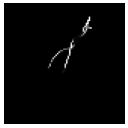

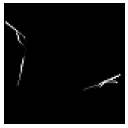

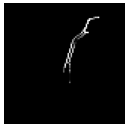

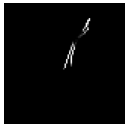

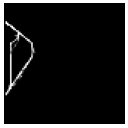

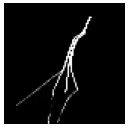

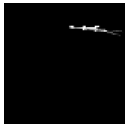

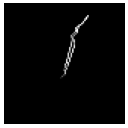

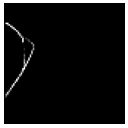

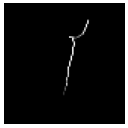

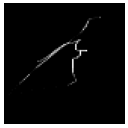

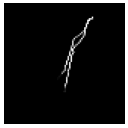

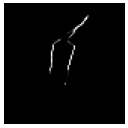

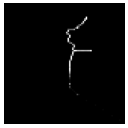

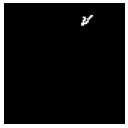

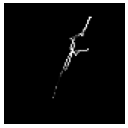

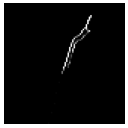

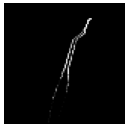

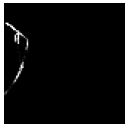

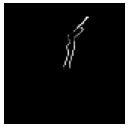

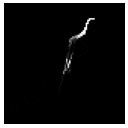

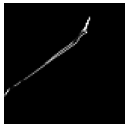

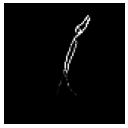

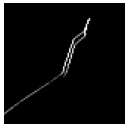

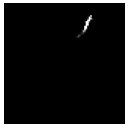

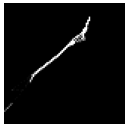

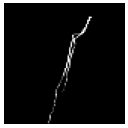

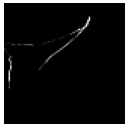

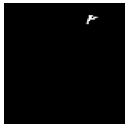

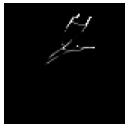

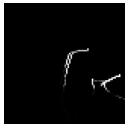

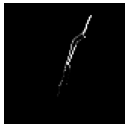

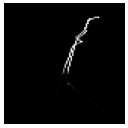

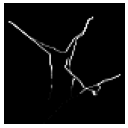

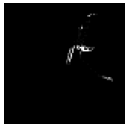

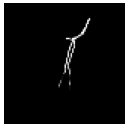

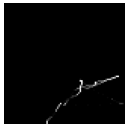

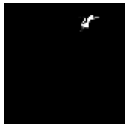

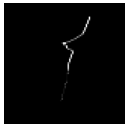

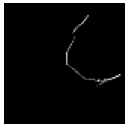

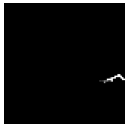

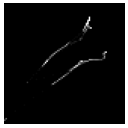

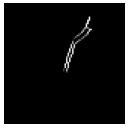

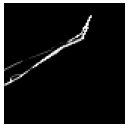

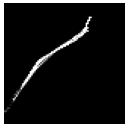

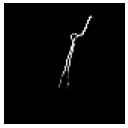

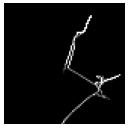

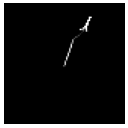

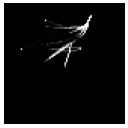

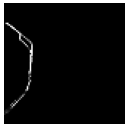

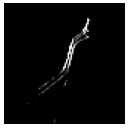

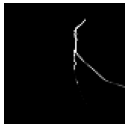

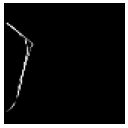

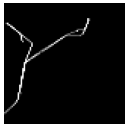

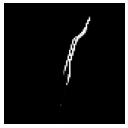

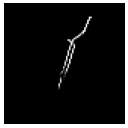

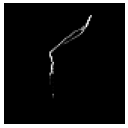

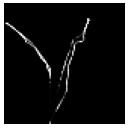

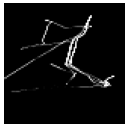

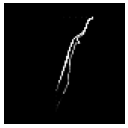

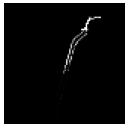

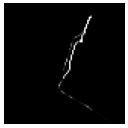

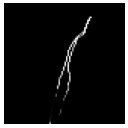

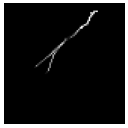

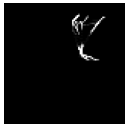

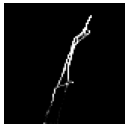

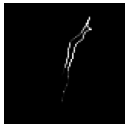

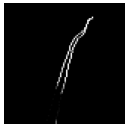

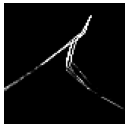

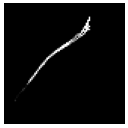

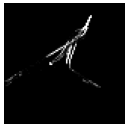

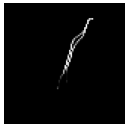

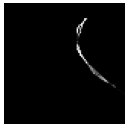

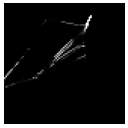

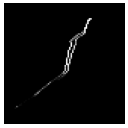

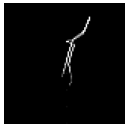

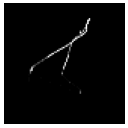

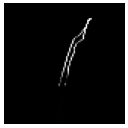

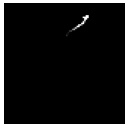

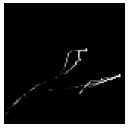

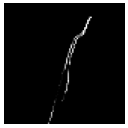

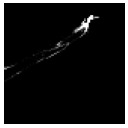

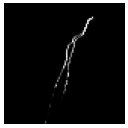

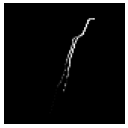

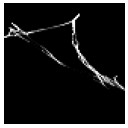

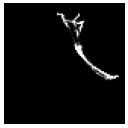

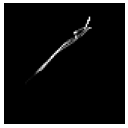

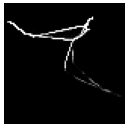

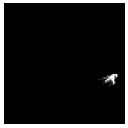

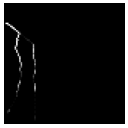

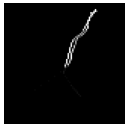

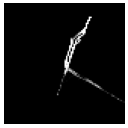

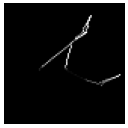

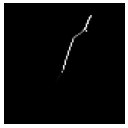

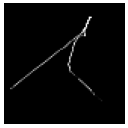

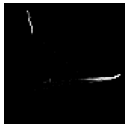

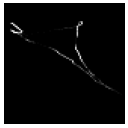

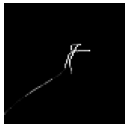

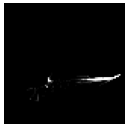

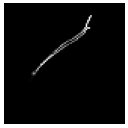

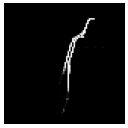

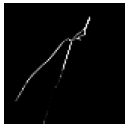

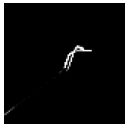

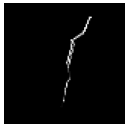

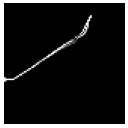

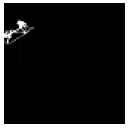

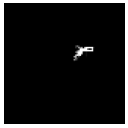

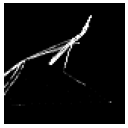

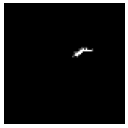

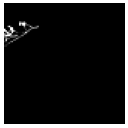

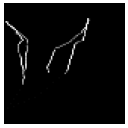

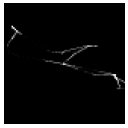

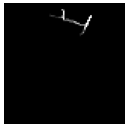

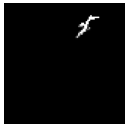

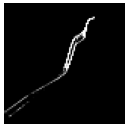

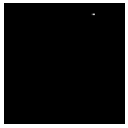

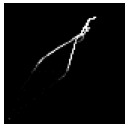

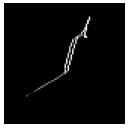

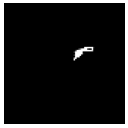

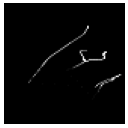

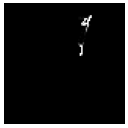

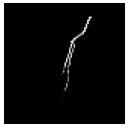

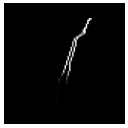

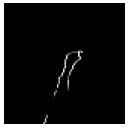

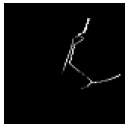

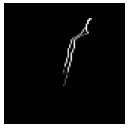

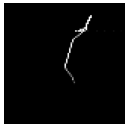

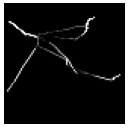

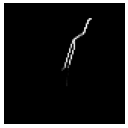

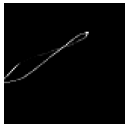

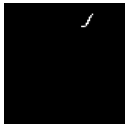

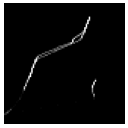

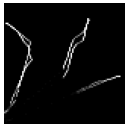

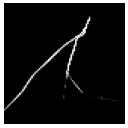

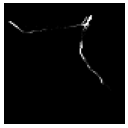

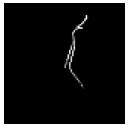

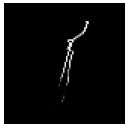

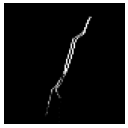

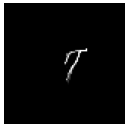

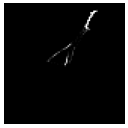

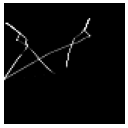

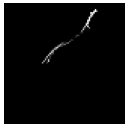

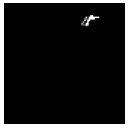

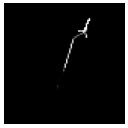

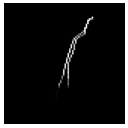

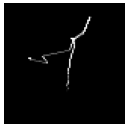

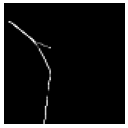

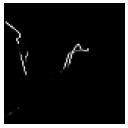

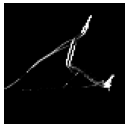

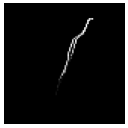

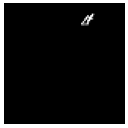

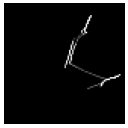

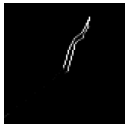

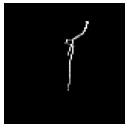

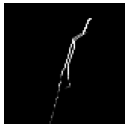

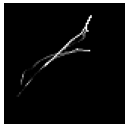

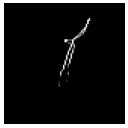

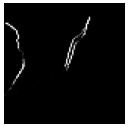

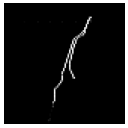

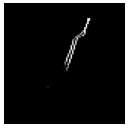

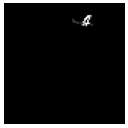

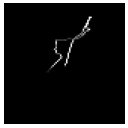

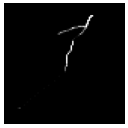

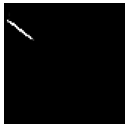

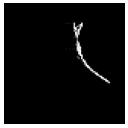

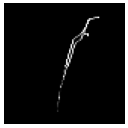

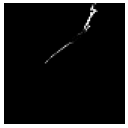

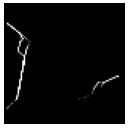

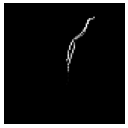

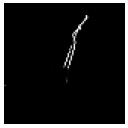

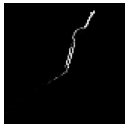

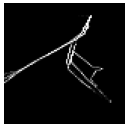

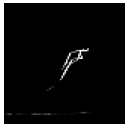

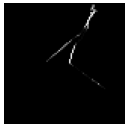

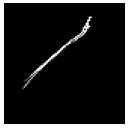

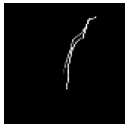

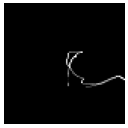

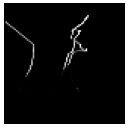

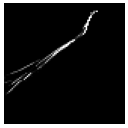

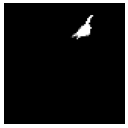

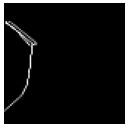

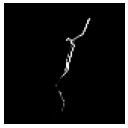

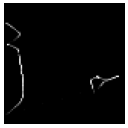

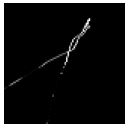

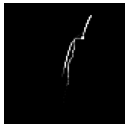

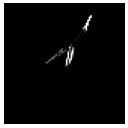

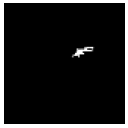

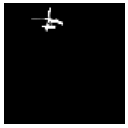

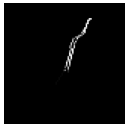

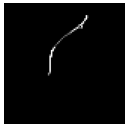

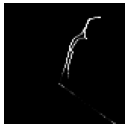

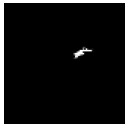

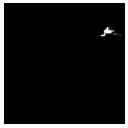

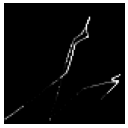

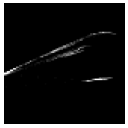

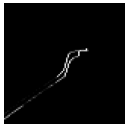

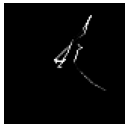

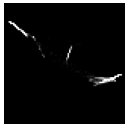

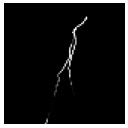

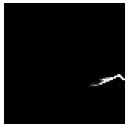

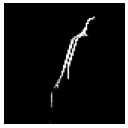

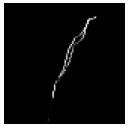

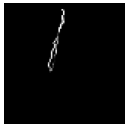

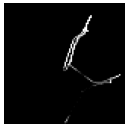

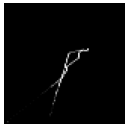

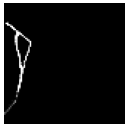

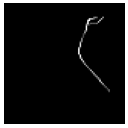

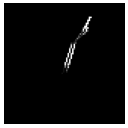

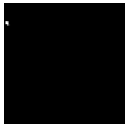

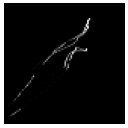

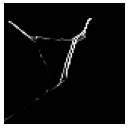

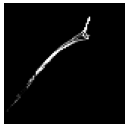

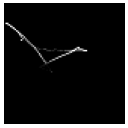

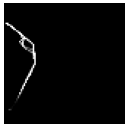

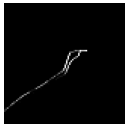

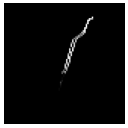

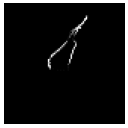

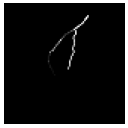

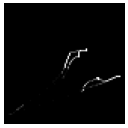

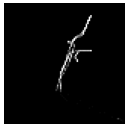

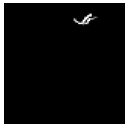

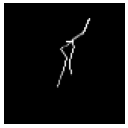

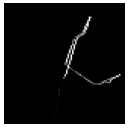

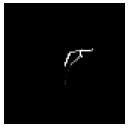

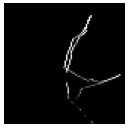

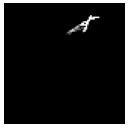

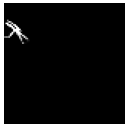

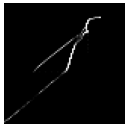

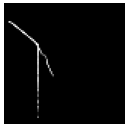

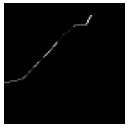

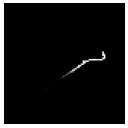

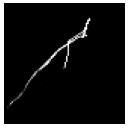

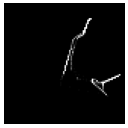

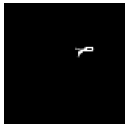

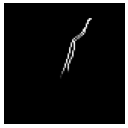

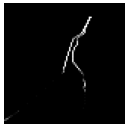

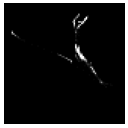

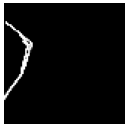

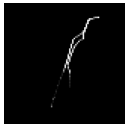

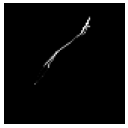

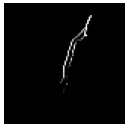

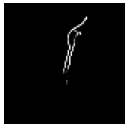

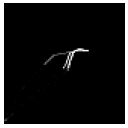

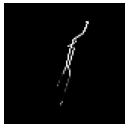

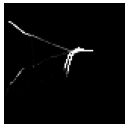

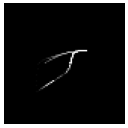

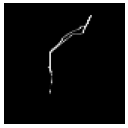

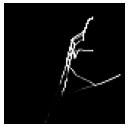

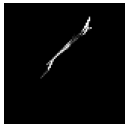

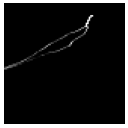

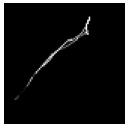

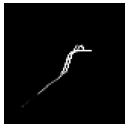

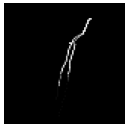

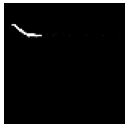

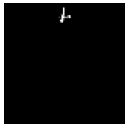

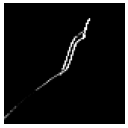

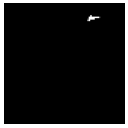

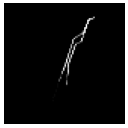

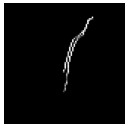

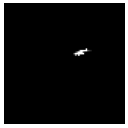

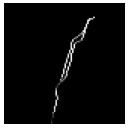

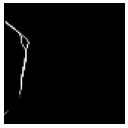

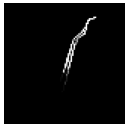

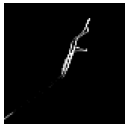

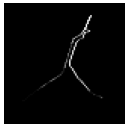

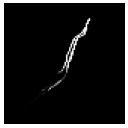

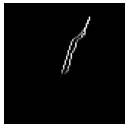

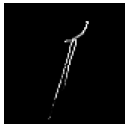

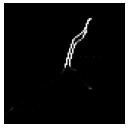

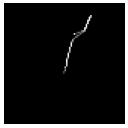

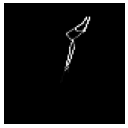

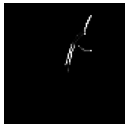

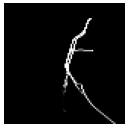

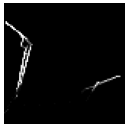

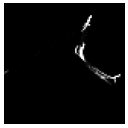

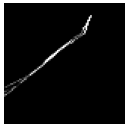

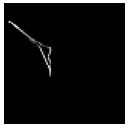

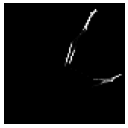

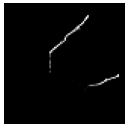

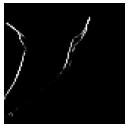

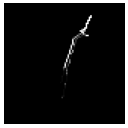

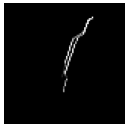

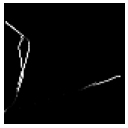

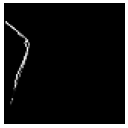

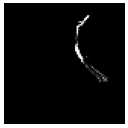

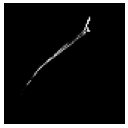

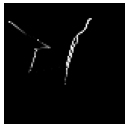

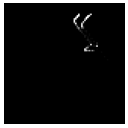

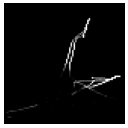

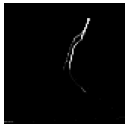

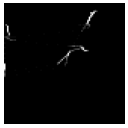

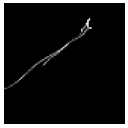

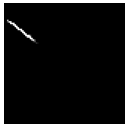

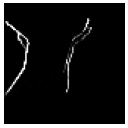

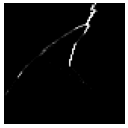

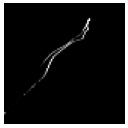

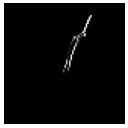

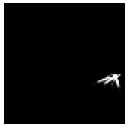

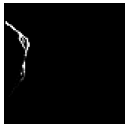

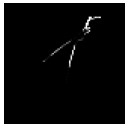

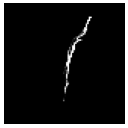

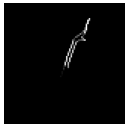

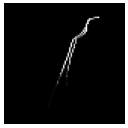

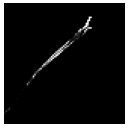

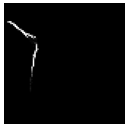

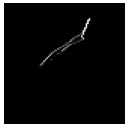

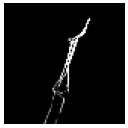

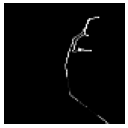

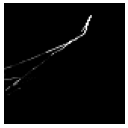

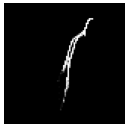

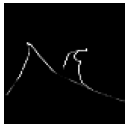

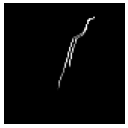

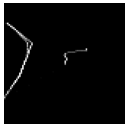

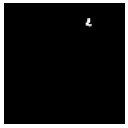

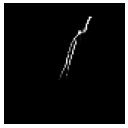

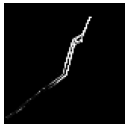

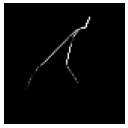

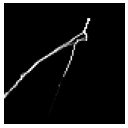

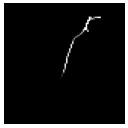

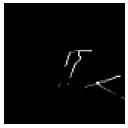

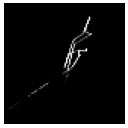

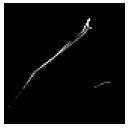

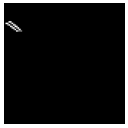

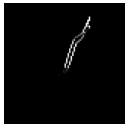

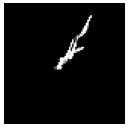

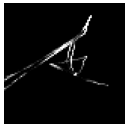

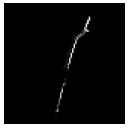

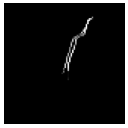

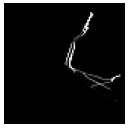

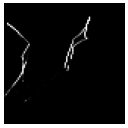

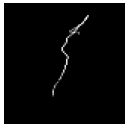

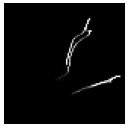

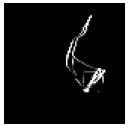

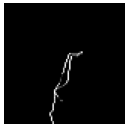

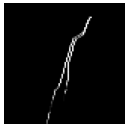

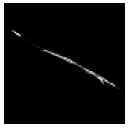

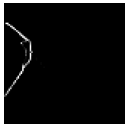

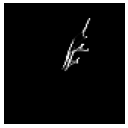

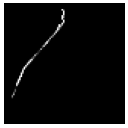

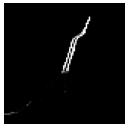

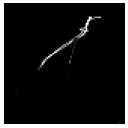

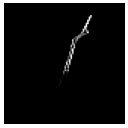

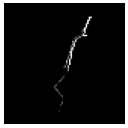

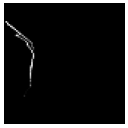

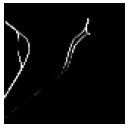

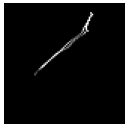

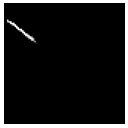

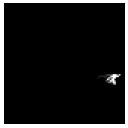

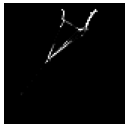

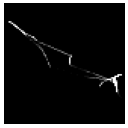

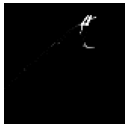

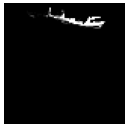

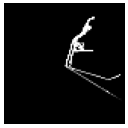

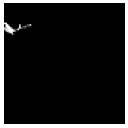

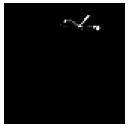

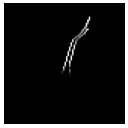

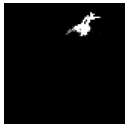

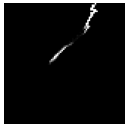

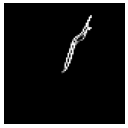

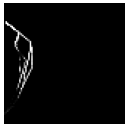

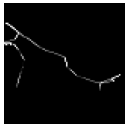

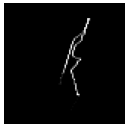

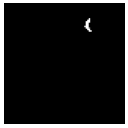

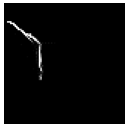

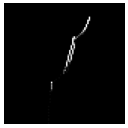

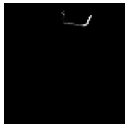

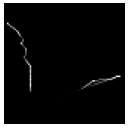

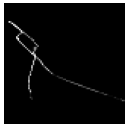

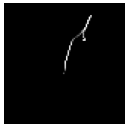

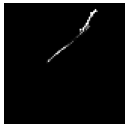

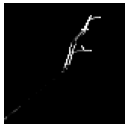

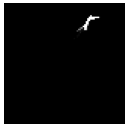

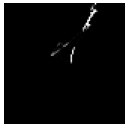

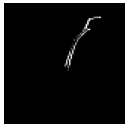

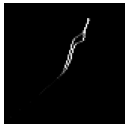

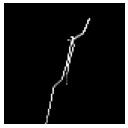

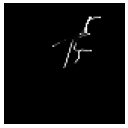

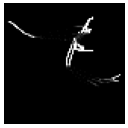

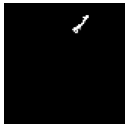

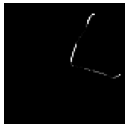

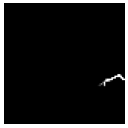

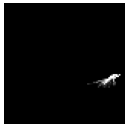

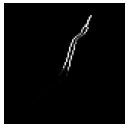

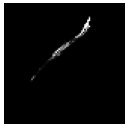

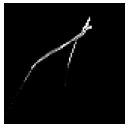

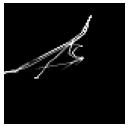

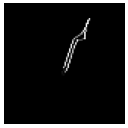

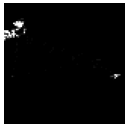

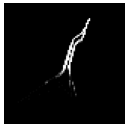

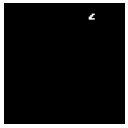

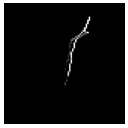

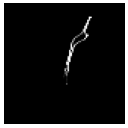

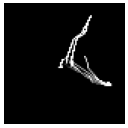

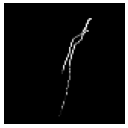

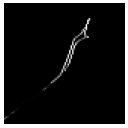

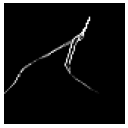

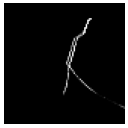

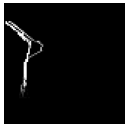

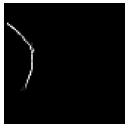

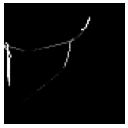

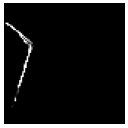

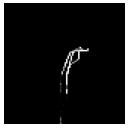

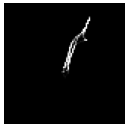

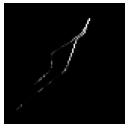

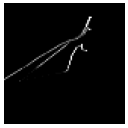

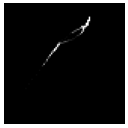

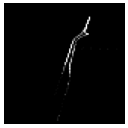

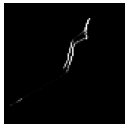

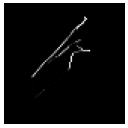

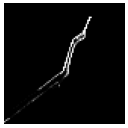

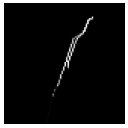

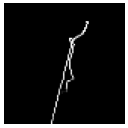

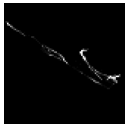

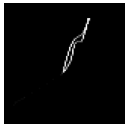

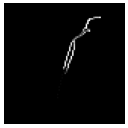

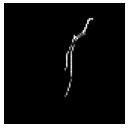

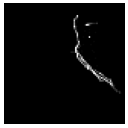

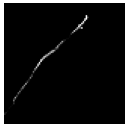

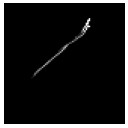

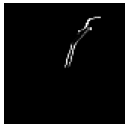

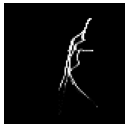

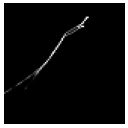

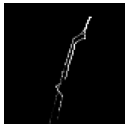

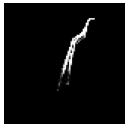

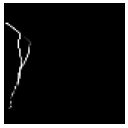

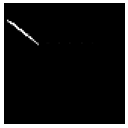

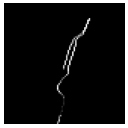

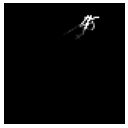

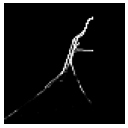

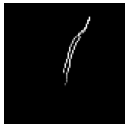

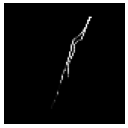

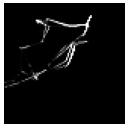

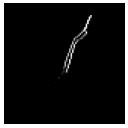

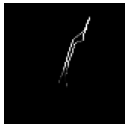

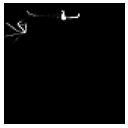

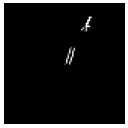

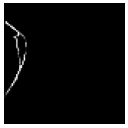

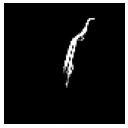

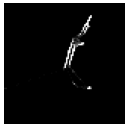

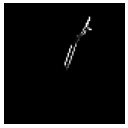

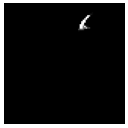

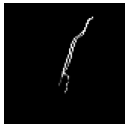

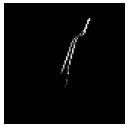

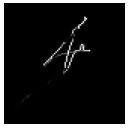

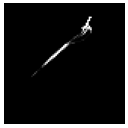

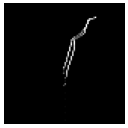

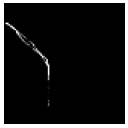

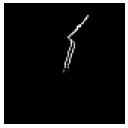

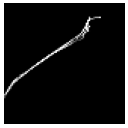

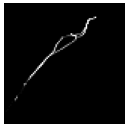

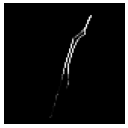

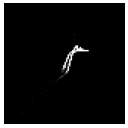

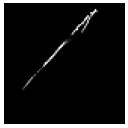

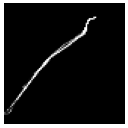

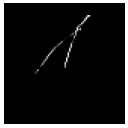

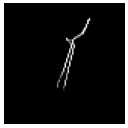

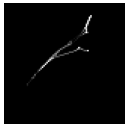

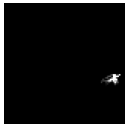

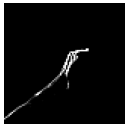

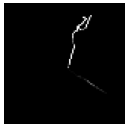

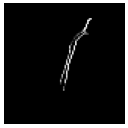

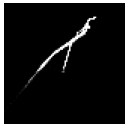

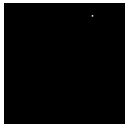

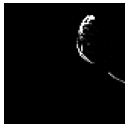

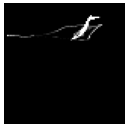

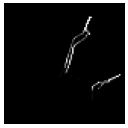

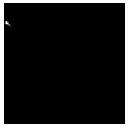

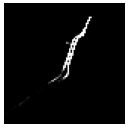

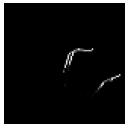

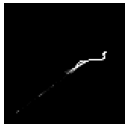

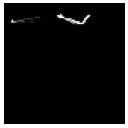

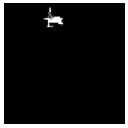

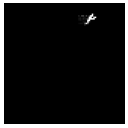

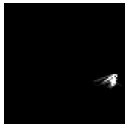

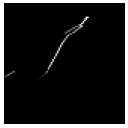

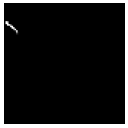

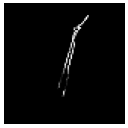

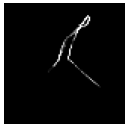

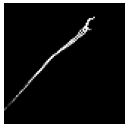

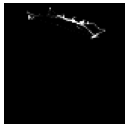

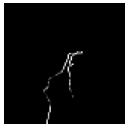

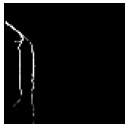

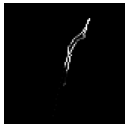

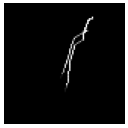

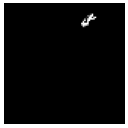

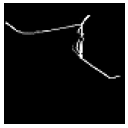

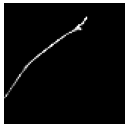

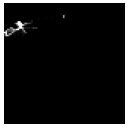

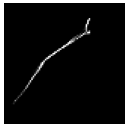

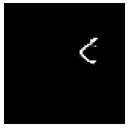

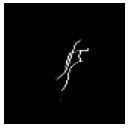

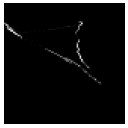

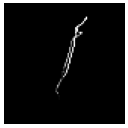

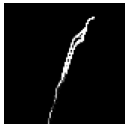

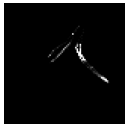

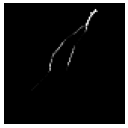

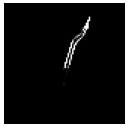

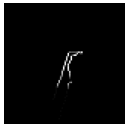

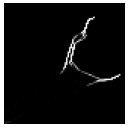

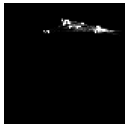

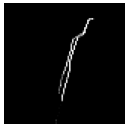

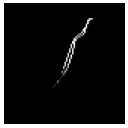

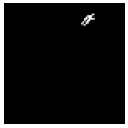

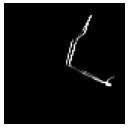

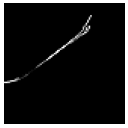

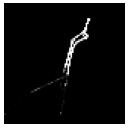

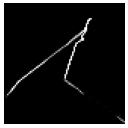

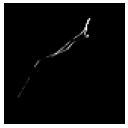

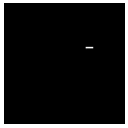

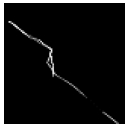

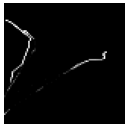

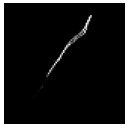

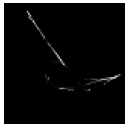

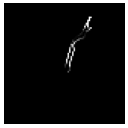

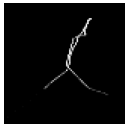

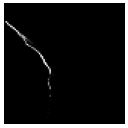

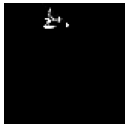

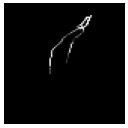

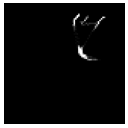

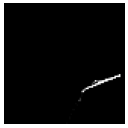

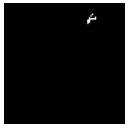

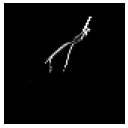

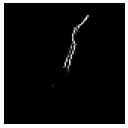

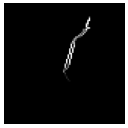

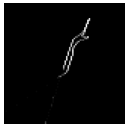

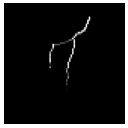

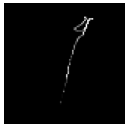

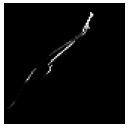

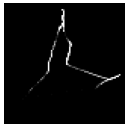

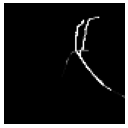

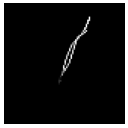

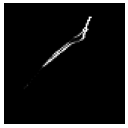

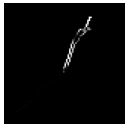

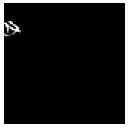

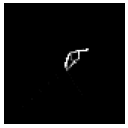

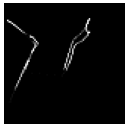

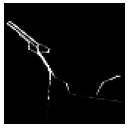

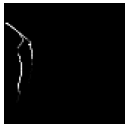

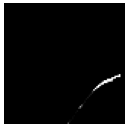

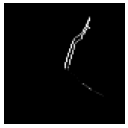

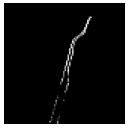

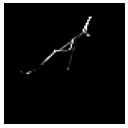

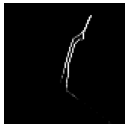

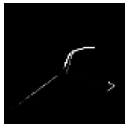

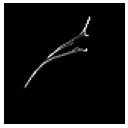

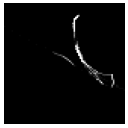

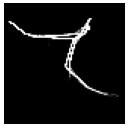

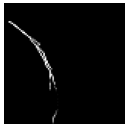

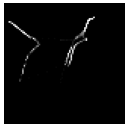

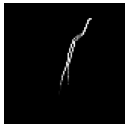

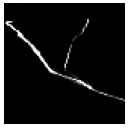

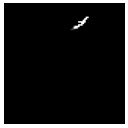

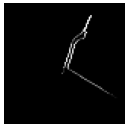

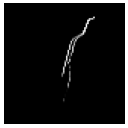

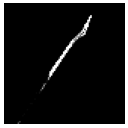

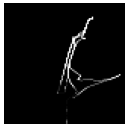

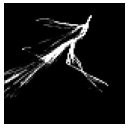

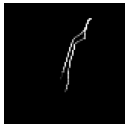

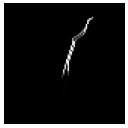

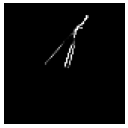

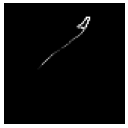

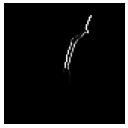

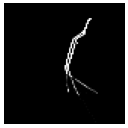

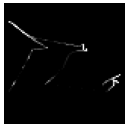

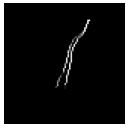

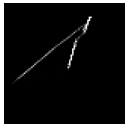

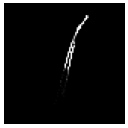

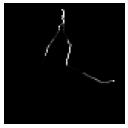

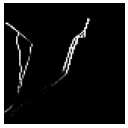

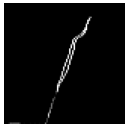

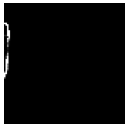

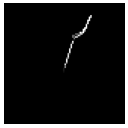

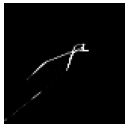

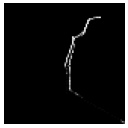

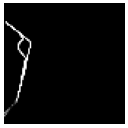

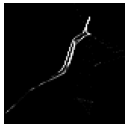

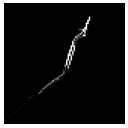

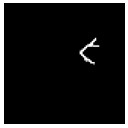

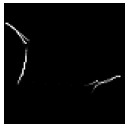

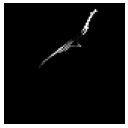

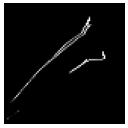

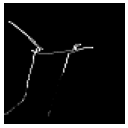

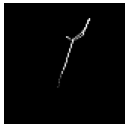

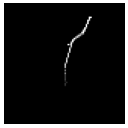

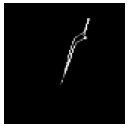

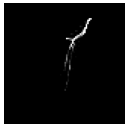

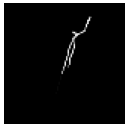

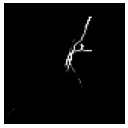

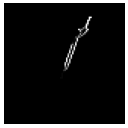

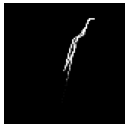

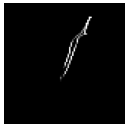

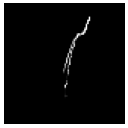

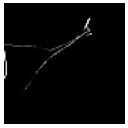

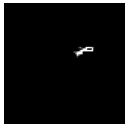

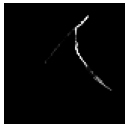

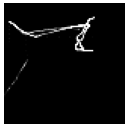

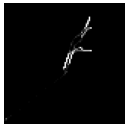

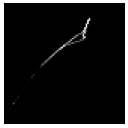

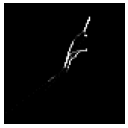

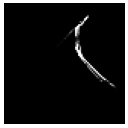

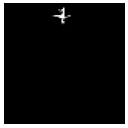

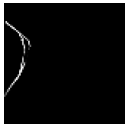

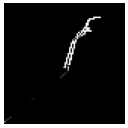

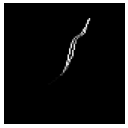

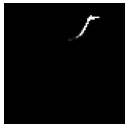

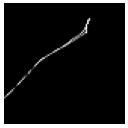

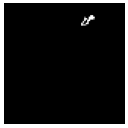

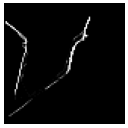

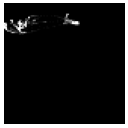

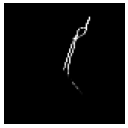

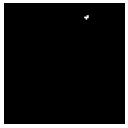

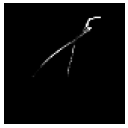

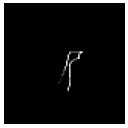

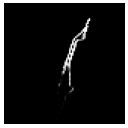

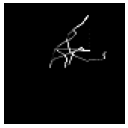

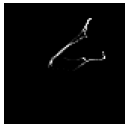

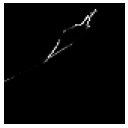

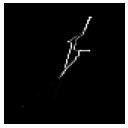

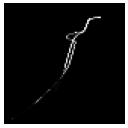

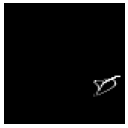

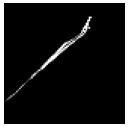

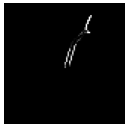

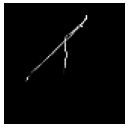

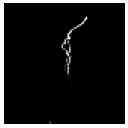

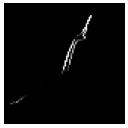

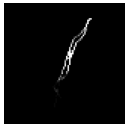

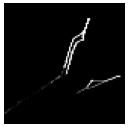

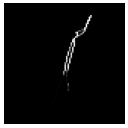

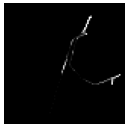

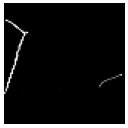

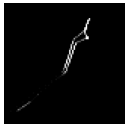

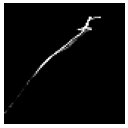

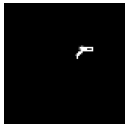

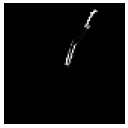

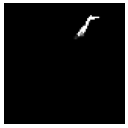

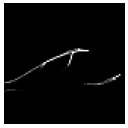

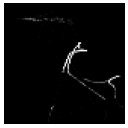

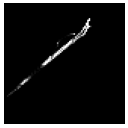

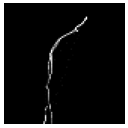

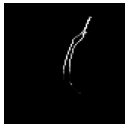

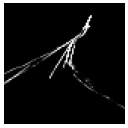

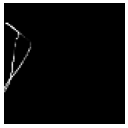

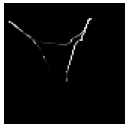

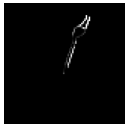

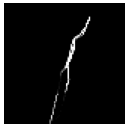

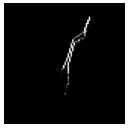

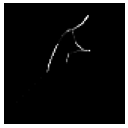

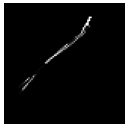

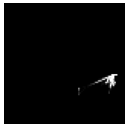

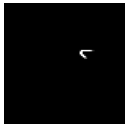

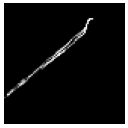

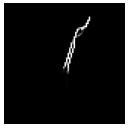

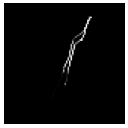

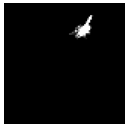

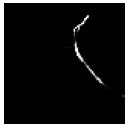

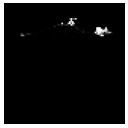

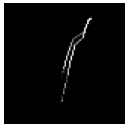

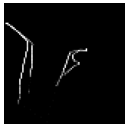

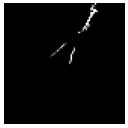

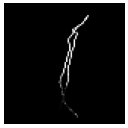

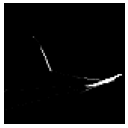

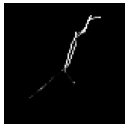

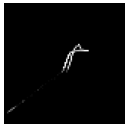

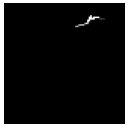

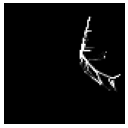

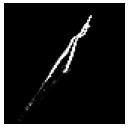

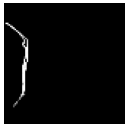

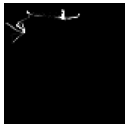

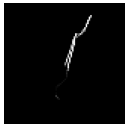

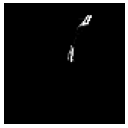

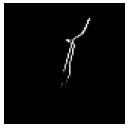

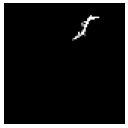

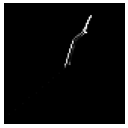

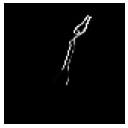

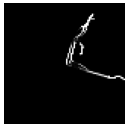

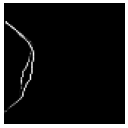

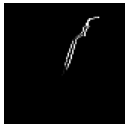

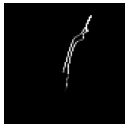

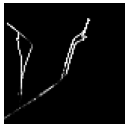

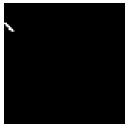

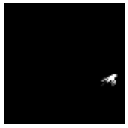

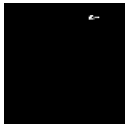

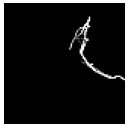

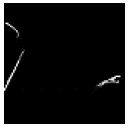

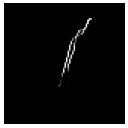

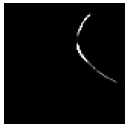

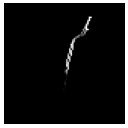

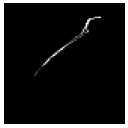

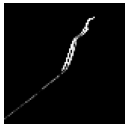

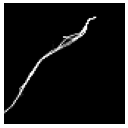

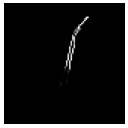

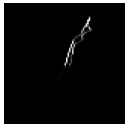

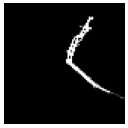

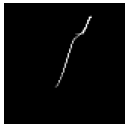

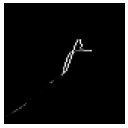

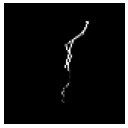

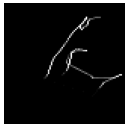

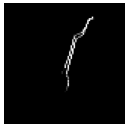

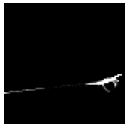

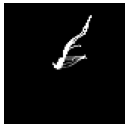

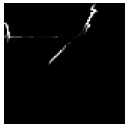

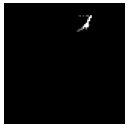

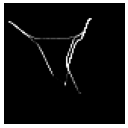

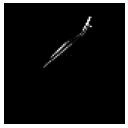

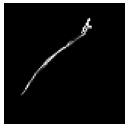

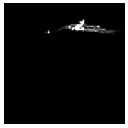

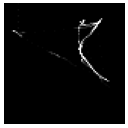

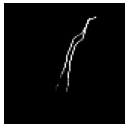

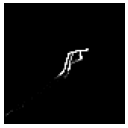

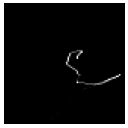

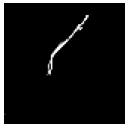

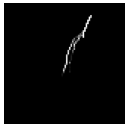

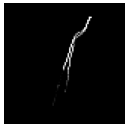

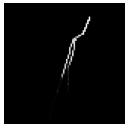

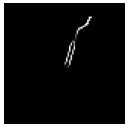

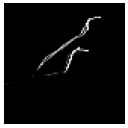

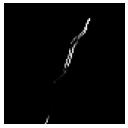

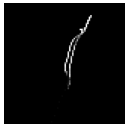

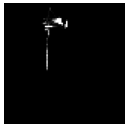

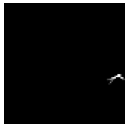

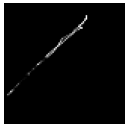

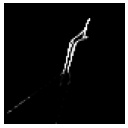

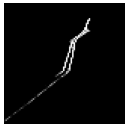

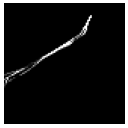

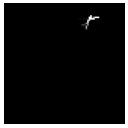

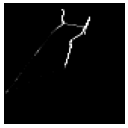

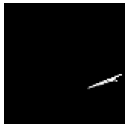

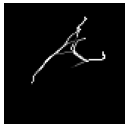

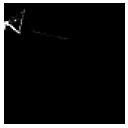

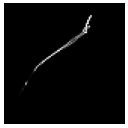

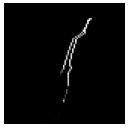

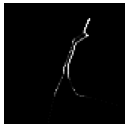

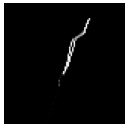

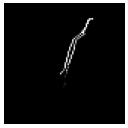

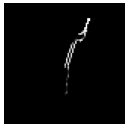

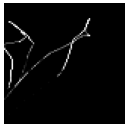

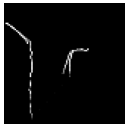

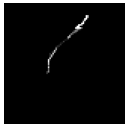

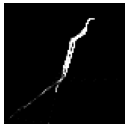

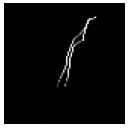

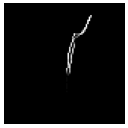

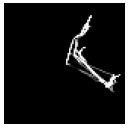

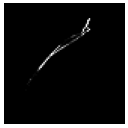

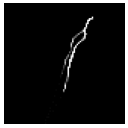

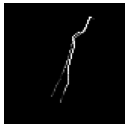

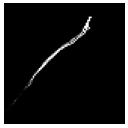

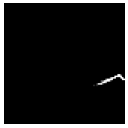

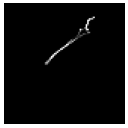

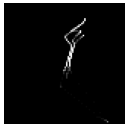

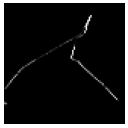

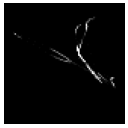

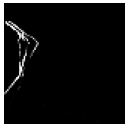

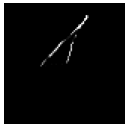

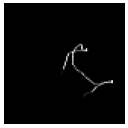

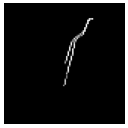

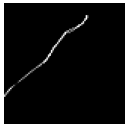

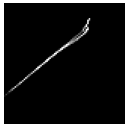

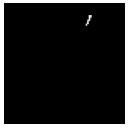

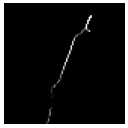

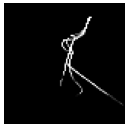

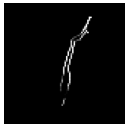

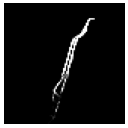

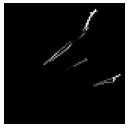

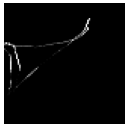

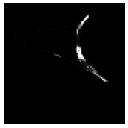

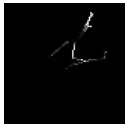

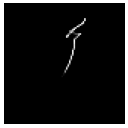

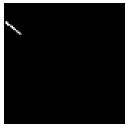

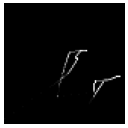

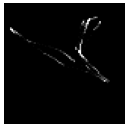

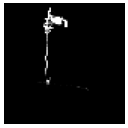

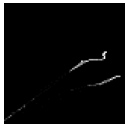

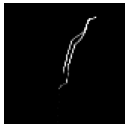

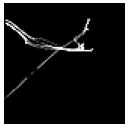

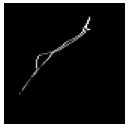

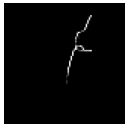

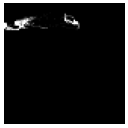

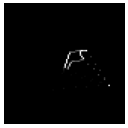

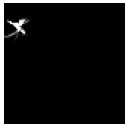

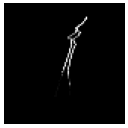

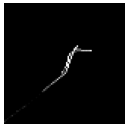

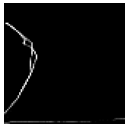

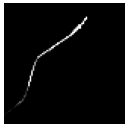

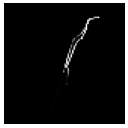

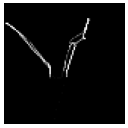

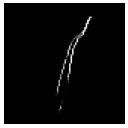

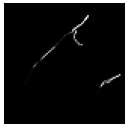

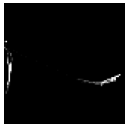

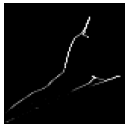

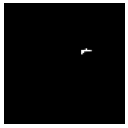

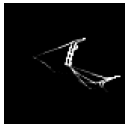

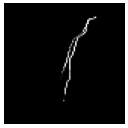

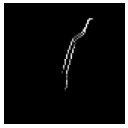

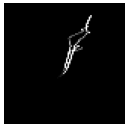

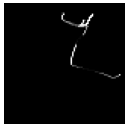

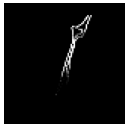

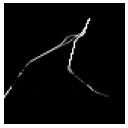

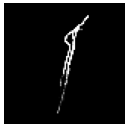

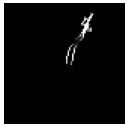

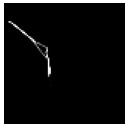

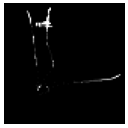

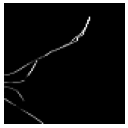

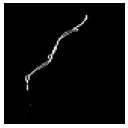

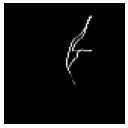

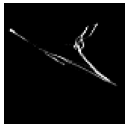

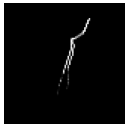

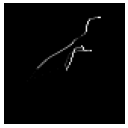

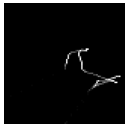

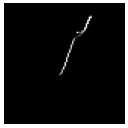

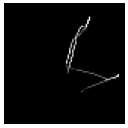

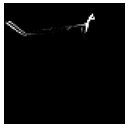

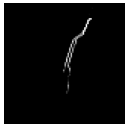

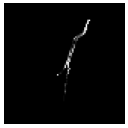

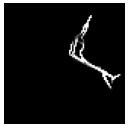

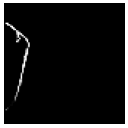

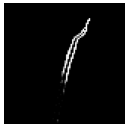

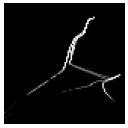

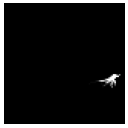

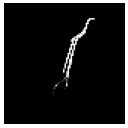

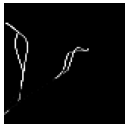

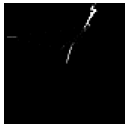

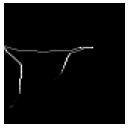

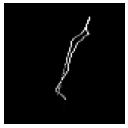

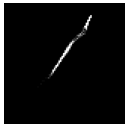

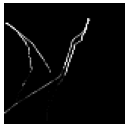

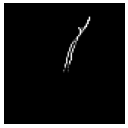

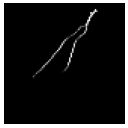

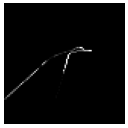

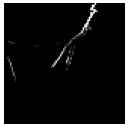

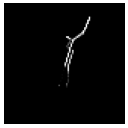

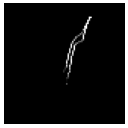

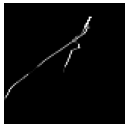

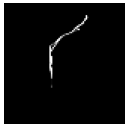

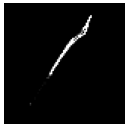

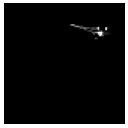

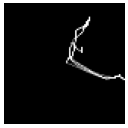

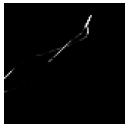

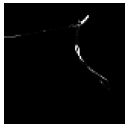

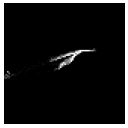

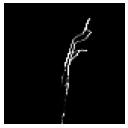

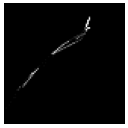

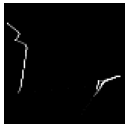

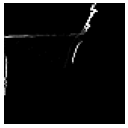

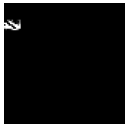

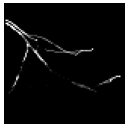

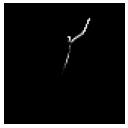

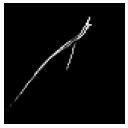

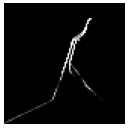

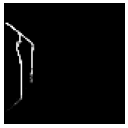

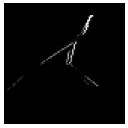

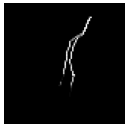

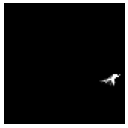

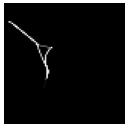

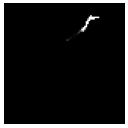

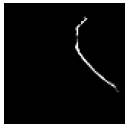

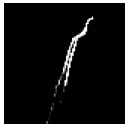

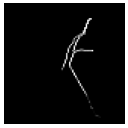

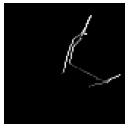

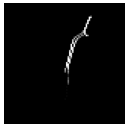

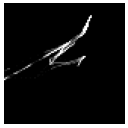

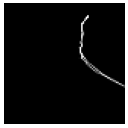

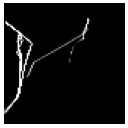

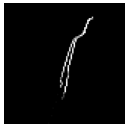

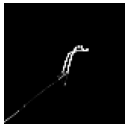

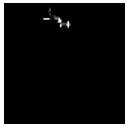

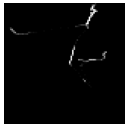

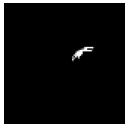

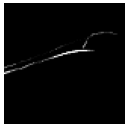

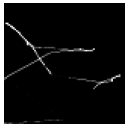

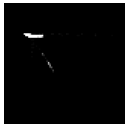

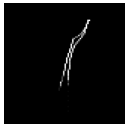

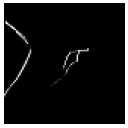

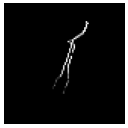

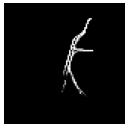

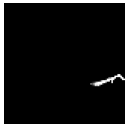

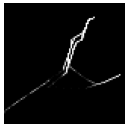

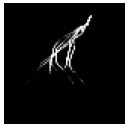

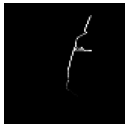

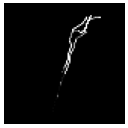

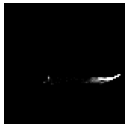

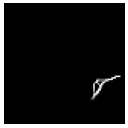

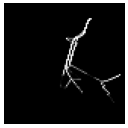

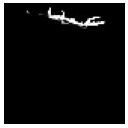

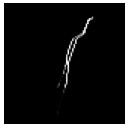

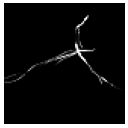

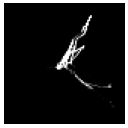

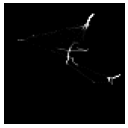

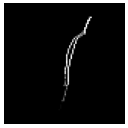

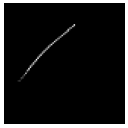

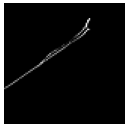

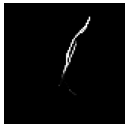

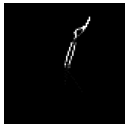

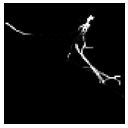

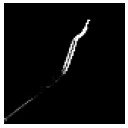

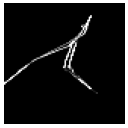

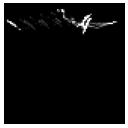

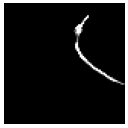

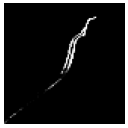

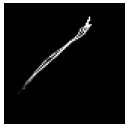

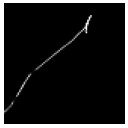

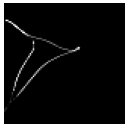

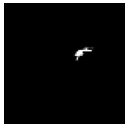

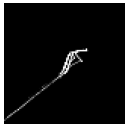

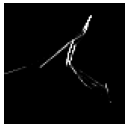

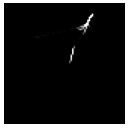

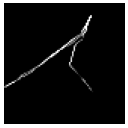

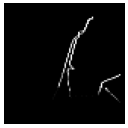

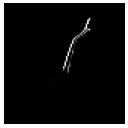

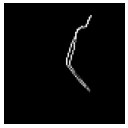

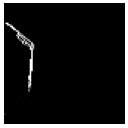

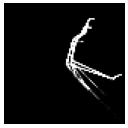

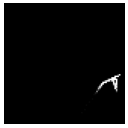

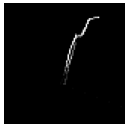

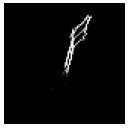

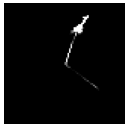

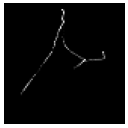

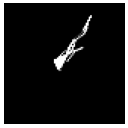

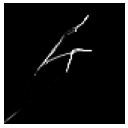

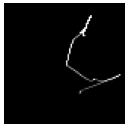

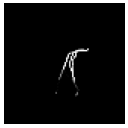

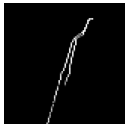

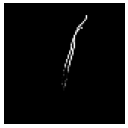

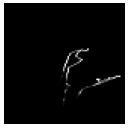

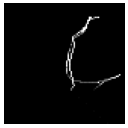

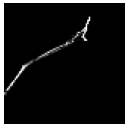

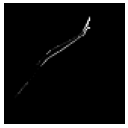

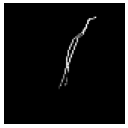

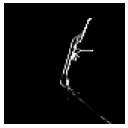

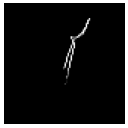

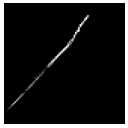

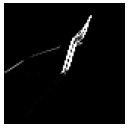

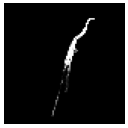

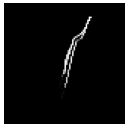

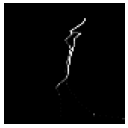

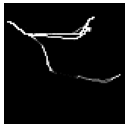

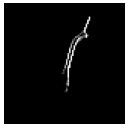

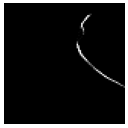

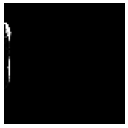

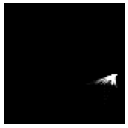

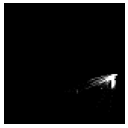

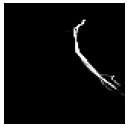

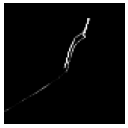

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
import os 

# 区域范围
LON1 = 117.455045
LON2 = 120.045957
LAT1 = 38.303857
LAT2 = 39.248607
def generalID(lon,lat,column_num,row_num):
    # 若在范围外的点，返回-1
    if lon <= LON1 or lon >= LON2 or lat <= LAT1 or lat >= LAT2:
        return -1
    # 把经度范围根据列数等分切割
    column = (LON2 - LON1)/column_num
    # 把纬度范围根据行数数等分切割
    row = (LAT2 - LAT1)/row_num
    # 得到二维矩阵坐标索引，并转换为一维ID，即： 列坐标区域（向下取整）+ 1 + 行坐标区域 * 列数
    x_index = int((lon-LON1)/column)
    y_index = int((lat-LAT1)/row)
    map_grid[x_index][y_index] += 2
    if (map_grid[x_index][y_index]>60):
        map_grid[x_index][y_index] = 60
    return int((lon-LON1)/column) , int((lat-LAT1)/row)

for info in os.listdir('../input/tjgaisplus'): 
    header = info.split('.')[0]
    domain = os.path.abspath(r'../input/tjgaisplus') #获取文件夹的路径 
    info = os.path.join(domain,info) #将路径与文件名结合起来就是每个文件的完整路径 
    new_data = pd.read_csv(info) 
    lon =[] 
    lat =[] 
    
    ## 使用 80 X 80 网格划分

    map_grid = np.zeros((80, 80))
    new_data['label'] = new_data.apply(lambda x: generalID(x['Lon_d'], x['Lat_d'],80,80), axis = 1)
    plt.xticks([])  # 去掉x轴
    plt.yticks([])  # 去掉y轴
    plt.axis('off')  # 去掉坐标轴
    plt.imshow(map_grid, cmap=plt.cm.gray)
    plt.rcParams['savefig.dpi'] = 100 #图片像素
    plt.rcParams['figure.dpi'] = 40 #分辨率
    filename = header + '.' + 'png'
    plt.savefig(filename)
    plt.show()